In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#IMPORTING ALL THE BASIC LIBRARIES

import gzip
import json
import pandas as pd                                              #importing the pandas library
import numpy as np                                               #importing the numpy library
import seaborn as sns                                            #importing the library for visualisatrion
import matplotlib.pyplot as plt                                  #importing the library for visualisatrion
from tabulate import tabulate                                    #For using the table form to our data
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing                                #For the preprocessing purpose
from sklearn.preprocessing import MinMaxScaler,StandardScaler    #for scaling the data
from sklearn.preprocessing import LabelEncoder                   # for converting the object columns to numerical one
from sklearn.preprocessing import StandardScaler                 #for scaling all the features on same scale
from sklearn.cluster import KMeans                               #for making the clusters
from sklearn.neighbors import NearestNeighbors                   #for selecting the clusters
from sklearn.metrics import silhouette_score                     #for checking the accuracy
import scipy.cluster.hierarchy as sch                            #for making the hirerchical graph to selecting the cluster
from sklearn.cluster import AgglomerativeClustering              #for making the hirerchical model
from sklearn.cluster import DBSCAN                               #density based clustering
from sklearn.preprocessing import Binarizer                      
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score


from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report 

# Loading the dataset

In [3]:
def load(data):
  load1 = []
  with gzip.open(data) as f:  #The gzip module provides the GzipFile class, as well as the open() , compress() and decompress() convenience functions. 
                              
    for line in f:
        load1.append(json.loads(line.strip()))
    df = pd.DataFrame(load1)
    return df
 

In [4]:
df_rev = load('All_Beauty.json.gz')
df_rev.shape

(371345, 12)

# SHAPE OF THE REVIEW DATA

In [5]:
df_rev.shape

(371345, 12)

# Columns of the review data

In [6]:
df_rev.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

# Information of the review data

In [7]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         371345 non-null  float64
 1   verified        371345 non-null  bool   
 2   reviewTime      371345 non-null  object 
 3   reviewerID      371345 non-null  object 
 4   asin            371345 non-null  object 
 5   reviewerName    371307 non-null  object 
 6   reviewText      370946 non-null  object 
 7   summary         371139 non-null  object 
 8   unixReviewTime  371345 non-null  int64  
 9   vote            51899 non-null   object 
 10  style           125958 non-null  object 
 11  image           8391 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 31.5+ MB


# Statistical evualtion of the review data

In [8]:
df_rev.describe()

overall  unixReviewTime
count  371345.000000    3.713450e+05
mean        4.112093    1.440742e+09
std         1.362099    6.962743e+07
min         1.000000    9.474624e+08
25%         4.000000    1.416096e+09
50%         5.000000    1.456963e+09
75%         5.000000    1.485562e+09
max         5.000000    1.538438e+09

In [9]:
df_meta = load('meta_All_Beauty.json.gz')
df_meta.head(3)

category tech1                                        description fit  \
0       []        [Loud 'N Clear Personal Sound Amplifier allows...       
1       []        [No7 Lift & Luminate Triple Action Serum 50ml ...       
2       []        [No7 Stay Perfect Foundation now stays perfect...       

                                               title  \
0      Loud 'N Clear&trade; Personal Sound Amplifier   
1  No7 Lift &amp; Luminate Triple Action Serum 50...   
2    No7 Stay Perfect Foundation Cool Vanilla by No7   

                   also_buy tech2         brand feature  \
0                        []        idea village      []   
1  [B01E7LCSL6, B008X5RVME]                          []   
2                        []                 No7      []   

                                    rank  \
0  2,938,573 in Beauty & Personal Care (   
1    872,854 in Beauty & Personal Care (   
2    956,696 in Beauty & Personal Care (   

                              also_view  \
0                                    []   
1                                    []   
2  [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]   

                                             details    main_cat  \
0                           {'ASIN: ': '6546546450'}  All Beauty   
1  {'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...  All Beauty   
2  {'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...  All Beauty   

                                        similar_item date   price        asin  \
0                                                                  6546546450   
1   class="a-bordered a-horizontal-stripes  a-spa...       $44.99  7178680776   
2                                                          $28.76  7250468162   

  imageURL imageURLHighRes  
0       []              []  
1       []              []  
2       []              []

# Shape of the meta data

In [10]:
df_meta.shape

(32892, 19)

# Columns of the meta data

In [11]:
df_meta.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')

# Info and dtypes of meta dat

In [12]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32892 entries, 0 to 32891
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         32892 non-null  object
 1   tech1            32892 non-null  object
 2   description      32892 non-null  object
 3   fit              32892 non-null  object
 4   title            32892 non-null  object
 5   also_buy         32892 non-null  object
 6   tech2            32892 non-null  object
 7   brand            32892 non-null  object
 8   feature          32892 non-null  object
 9   rank             32892 non-null  object
 10  also_view        32892 non-null  object
 11  details          32892 non-null  object
 12  main_cat         32892 non-null  object
 13  similar_item     32892 non-null  object
 14  date             32892 non-null  object
 15  price            32892 non-null  object
 16  asin             32892 non-null  object
 17  imageURL         32892 non-null

# Merging both the datasets of review and metadata for furthur analysis

In [13]:
beauty_data = pd.merge(df_rev,df_meta,on='asin')

# Data Pre-Processing.

In [14]:
beauty_data_copy = beauty_data.copy()

In [15]:
beauty_data_copy.head(3)

overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  03 10, 2016   A5TA1NJOC0PJ5  7414204790   
1      5.0      True   09 1, 2015  A1TJICB7VLGQKL  7414204790   
2      5.0      True   10 3, 2014   A80M2286B7STE  7414204790   

      reviewerName           reviewText     summary  unixReviewTime vote  ...  \
0  Amazon Customer  Excellent very good  Five Stars      1457568000  NaN  ...   
1               LH        Great product  Five Stars      1441065600  NaN  ...   
2            dolly              Magical  Five Stars      1412294400  NaN  ...   

  feature                                rank  \
0      []  67,701 in Beauty & Personal Care (   
1      []  67,701 in Beauty & Personal Care (   
2      []  67,701 in Beauty & Personal Care (   

                                           also_view  \
0  [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...   
1  [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...   
2  [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...   

                                             details    main_cat similar_item  \
0  {'Shipping Weight:': '12 ounces (', 'ASIN: ': ...  All Beauty                
1  {'Shipping Weight:': '12 ounces (', 'ASIN: ': ...  All Beauty                
2  {'Shipping Weight:': '12 ounces (', 'ASIN: ': ...  All Beauty                

  date   price                                           imageURL  \
0       $12.15  [https://images-na.ssl-images-amazon.com/image...   
1       $12.15  [https://images-na.ssl-images-amazon.com/image...   
2       $12.15  [https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes  
0  [https://images-na.ssl-images-amazon.com/image...  
1  [https://images-na.ssl-images-amazon.com/image...  
2  [https://images-na.ssl-images-amazon.com/image...  

[3 rows x 30 columns]

In [16]:
beauty_data_copy.tail(3)

overall  verified   reviewTime      reviewerID        asin  \
382529      5.0      True  05 29, 2017  A1IYJVHJSCR8DR  B01HJ84SGM   
382530      5.0      True   05 9, 2017   A7WHO9ZFPHU2B  B01HJ84SGM   
382531      1.0      True  08 31, 2016  A15UPE8UMHA5KR  B01HJASD20   

             reviewerName                                         reviewText  \
382529          Marcus Y.  I have been using this for years and I believe...   
382530  David P. Birtwell  I think D-Mannose, Nature's Herbs, Cranberry W...   
382531             PS1234  These legitimately look used, like they repack...   

                                         summary  unixReviewTime vote  ...  \
382529           Great product. Very beneficial.      1496016000  NaN  ...   
382530                             Lifesavers...      1494288000  NaN  ...   
382531  Look used, save your money and don't buy      1472601600    3  ...   

       feature                                 rank  \
382529      []  207,410 in Beauty & Personal Care (   
382530      []  207,410 in Beauty & Personal Care (   
382531      []  965,673 in Beauty & Personal Care (   

                                                also_view  \
382529  [B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...   
382530  [B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...   
382531                                                 []   

                                                  details    main_cat  \
382529  {'Shipping Weight:': '1 pounds (', 'ASIN: ': '...  All Beauty   
382530  {'Shipping Weight:': '1 pounds (', 'ASIN: ': '...  All Beauty   
382531  {'Shipping Weight:': '4.8 ounces (', 'ASIN: ':...  All Beauty   

       similar_item date   price  \
382529                    $55.63   
382530                    $55.63   
382531                    $12.99   

                                                 imageURL  \
382529                                                 []   
382530                                                 []   
382531  [https://images-na.ssl-images-amazon.com/image...   

                                          imageURLHighRes  
382529                                                 []  
382530                                                 []  
382531  [https://images-na.ssl-images-amazon.com/image...  

[3 rows x 30 columns]

In [17]:
beauty_data_copy['style']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
382527    NaN
382528    NaN
382529    NaN
382530    NaN
382531    NaN
Name: style, Length: 382532, dtype: object

# Shape of merged data

In [18]:
beauty_data_copy.shape

(382532, 30)

# Columns of the data

In [19]:
beauty_data_copy.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')

# Information and summary of merged data

In [20]:
beauty_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382532 entries, 0 to 382531
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          382532 non-null  float64
 1   verified         382532 non-null  bool   
 2   reviewTime       382532 non-null  object 
 3   reviewerID       382532 non-null  object 
 4   asin             382532 non-null  object 
 5   reviewerName     382493 non-null  object 
 6   reviewText       382132 non-null  object 
 7   summary          382320 non-null  object 
 8   unixReviewTime   382532 non-null  int64  
 9   vote             54741 non-null   object 
 10  style            128104 non-null  object 
 11  image            8410 non-null    object 
 12  category         382532 non-null  object 
 13  tech1            382532 non-null  object 
 14  description      382532 non-null  object 
 15  fit              382532 non-null  object 
 16  title            382532 non-null  obje

# Checking for missing values in our merged dataset.

In [21]:
beauty_data_copy.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName           39
reviewText            400
summary               212
unixReviewTime          0
vote               327791
style              254428
image              374122
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
details                 0
main_cat                0
similar_item            0
date                    0
price                   0
imageURL                0
imageURLHighRes         0
dtype: int64

## Percentage of null values.

In [22]:
beauty_data_copy.isnull().sum()/len(beauty_data)*100

overall             0.000000
verified            0.000000
reviewTime          0.000000
reviewerID          0.000000
asin                0.000000
reviewerName        0.010195
reviewText          0.104566
summary             0.055420
unixReviewTime      0.000000
vote               85.689825
style              66.511560
image              97.801491
category            0.000000
tech1               0.000000
description         0.000000
fit                 0.000000
title               0.000000
also_buy            0.000000
tech2               0.000000
brand               0.000000
feature             0.000000
rank                0.000000
also_view           0.000000
details             0.000000
main_cat            0.000000
similar_item        0.000000
date                0.000000
price               0.000000
imageURL            0.000000
imageURLHighRes     0.000000
dtype: float64

### ***Looking at the percentage of null values in the columns:- vote, image it makes sense to drop them because if we try to fill them with mode/median/mode data can get highly imbalanced which is not appropiate for our furthur analysis.***

In [23]:
beauty_data_copy = beauty_data_copy.drop(columns='image')
beauty_data_copy = beauty_data_copy.drop(columns='vote')

# Filling the NaN values with not available

In [ ]:
#beauty_data_copy['reviewText'].fillna('Review not available', inplace=True)

#we cannot do this as filling review with some text will lead to a false sentiment analysis of the review text.

In [24]:
beauty_data_copy['reviewerName'].fillna('Name not available', inplace=True)

In [25]:
beauty_data_copy = beauty_data_copy.dropna()

In [ ]:
#beauty_data_copy['summary'].fillna('summary not available', inplace=True)
#we cannot do this as filling review with some text will lead to a false sentiment analysis of the review text.

In [26]:
beauty_data_copy.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

Unix time is a way of representing a timestamp by representing the time as the number of seconds since January 1st, 1970 at 00:00:00 UTC. One of the primary benefits of using Unix time is that it can be represented as an integer making it easier to parse and use across different systems.

This particular column gives us an idea of the 'time' at which review was given which would not have much of an impact on our analysis.

In [27]:
beauty_data_copy['unixReviewTime']

38        1425859200
39        1425254400
40        1424304000
41        1421193600
42        1358035200
             ...    
382397    1475625600
382413    1500163200
382453    1512604800
382462    1517961600
382510    1498953600
Name: unixReviewTime, Length: 127930, dtype: int64

In [28]:
beauty_data_copy = beauty_data_copy.drop(columns='unixReviewTime')

In [29]:
beauty_data_copy[['style']]

style
38                                   {'Size:': ' 3.4 oz'}
39                                   {'Size:': ' 3.4 oz'}
40                                   {'Size:': ' 3.4 oz'}
41                                   {'Size:': ' 3.4 oz'}
42                                   {'Size:': ' 3.4 oz'}
...                                                   ...
382397                                 {'Color:': ' Red'}
382413  {'Size:': ' Back Posture Corrector - Model PC5...
382453                                {'Color:': ' 20.5'}
382462                                {'Size:': ' 8 oz.'}
382510                            {'Size:': ' Pack of 1'}

[127930 rows x 1 columns]

In [30]:
beauty_data_copy.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

### Dropping the null values 

In [31]:
beauty_data_copy = beauty_data_copy.dropna()

In [32]:
beauty_data_copy.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

In [33]:
beauty_data_copy

overall  verified   reviewTime      reviewerID        asin  \
38          5.0      True   03 9, 2015   ASZO5WJA6FVVH  9790787006   
39          5.0      True   03 2, 2015  A1KU7EEUGYOJYD  9790787006   
40          5.0      True  02 19, 2015  A1907XNEJPEZEI  9790787006   
41          5.0      True  01 14, 2015  A3U7B0EKSK16MQ  9790787006   
42          5.0     False  01 13, 2013  A3OCOP75PMY097  9790787006   
...         ...       ...          ...             ...         ...   
382397      5.0      True   10 5, 2016   APZLYTVXCR6US  B01HEYYRIK   
382413      5.0      True  07 16, 2017   ANKKUIW6N8GTL  B01HFI8A24   
382453      5.0      True   12 7, 2017  A13XUPIGCR6IRP  B01HG56VYA   
382462      5.0      True   02 7, 2018  A1EHXW0RJ820NP  B01HH9W6WQ   
382510      1.0      True   07 2, 2017   AUG30JEFFDB4L  B01HIE3EK8   

           reviewerName                                         reviewText  \
38         Petra Zender  it is still to this day my favorite glad you h...   
39                    V  Love the way this perfume smells.  Such a soft...   
40      Linda Giambrone  love this perfume!  I get so many compliments ...   
41                 Kane  This is a well done scent its slightly sweet, ...   
42          Jim Francis  The package was a complete satisfaction to my ...   
...                 ...                                                ...   
382397   Sonya Elizalde                                 Nice not too bulky   
382413          majario  Very easy to get hair off my body when I get m...   
382453           Jessie            Love the moomin packaging. Great price.   
382462   Kandis Griffis  amazing leaves my skin so soft and smells sooo...   
382510  Amazon Customer  The item arrived without too protective piece ...   

                                                  summary  \
38                                             Five Stars   
39                                             Five Stars   
40                                             Five Stars   
41      a bit Sweet, a lot Spicy, feels Warm & definit...   
42                                      Excellent product   
...                                                   ...   
382397                                         Five Stars   
382413                                  Great hair duster   
382453                                  Just as pictured.   
382462  amazing leaves my skin so soft and smells sooo...   
382510                           Fake product- do not buy   

                                                    style category  ...  \
38                                   {'Size:': ' 3.4 oz'}       []  ...   
39                                   {'Size:': ' 3.4 oz'}       []  ...   
40                                   {'Size:': ' 3.4 oz'}       []  ...   
41                                   {'Size:': ' 3.4 oz'}       []  ...   
42                                   {'Size:': ' 3.4 oz'}       []  ...   
...                                                   ...      ...  ...   
382397                                 {'Color:': ' Red'}       []  ...   
382413  {'Size:': ' Back Posture Corrector - Model PC5...       []  ...   
382453                                {'Color:': ' 20.5'}       []  ...   
382462                                {'Size:': ' 8 oz.'}       []  ...   
382510                            {'Size:': ' Pack of 1'}       []  ...   

       feature                                     rank  \
38          []  298,893 in Beauty &amp; Personal Care (   
39          []  298,893 in Beauty &amp; Personal Care (   
40          []  298,893 in Beauty &amp; Personal Care (   
41          []  298,893 in Beauty &amp; Personal Care (   
42          []  298,893 in Beauty &amp; Personal Care (   
...        ...                                      ...   
382397      []      271,281 in Beauty & Personal Care (   
382413      []    1,384,634 in Beauty & Personal Care (   
382453      []    1,765,484 in Beauty & Personal Care (   
382462

In [34]:
beauty_data_copy.reset_index(drop=True,inplace=True)
beauty_data_copy.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True   03 9, 2015   ASZO5WJA6FVVH  9790787006   
1      5.0      True   03 2, 2015  A1KU7EEUGYOJYD  9790787006   
2      5.0      True  02 19, 2015  A1907XNEJPEZEI  9790787006   
3      5.0      True  01 14, 2015  A3U7B0EKSK16MQ  9790787006   
4      5.0     False  01 13, 2013  A3OCOP75PMY097  9790787006   

      reviewerName                                         reviewText  \
0     Petra Zender  it is still to this day my favorite glad you h...   
1                V  Love the way this perfume smells.  Such a soft...   
2  Linda Giambrone  love this perfume!  I get so many compliments ...   
3             Kane  This is a well done scent its slightly sweet, ...   
4      Jim Francis  The package was a complete satisfaction to my ...   

                                             summary                 style  \
0                                         Five Stars  {'Size:': ' 3.4 oz'}   
1                                         Five Stars  {'Size:': ' 3.4 oz'}   
2                                         Five Stars  {'Size:': ' 3.4 oz'}   
3  a bit Sweet, a lot Spicy, feels Warm & definit...  {'Size:': ' 3.4 oz'}   
4                                  Excellent product  {'Size:': ' 3.4 oz'}   

  category  ... feature                                     rank  \
0       []  ...      []  298,893 in Beauty &amp; Personal Care (   
1       []  ...      []  298,893 in Beauty &amp; Personal Care (   
2       []  ...      []  298,893 in Beauty &amp; Personal Care (   
3       []  ...      []  298,893 in Beauty &amp; Personal Care (   
4       []  ...      []  298,893 in Beauty &amp; Personal Care (   

                              also_view  \
0  [B00357FTX8, B01NBID7FJ, B0017JT658]   
1  [B00357FTX8, B01NBID7FJ, B0017JT658]   
2  [B00357FTX8, B01NBID7FJ, B0017JT658]   
3  [B00357FTX8, B01NBID7FJ, B0017JT658]   
4  [B00357FTX8, B01NBID7FJ, B0017JT658]   

                                             details    main_cat similar_item  \
0  {'Shipping Weight:': '12.8 ounces (', 'ASIN: '...  All Beauty                
1  {'Shipping Weight:': '12.8 ounces (', 'ASIN: '...  All Beauty                
2  {'Shipping Weight:': '12.8 ounces (', 'ASIN: '...  All Beauty                
3  {'Shipping Weight:': '12.8 ounces (', 'ASIN: '...  All Beauty                
4  {'Shipping Weight:': '12.8 ounces (', 'ASIN: '...  All Beauty                

  date   price                                           imageURL  \
0       $13.85  [https://images-na.ssl-images-amazon.com/image...   
1       $13.85  [https://images-na.ssl-images-amazon.com/image...   
2       $13.85  [https://images-na.ssl-images-amazon.com/image...   
3       $13.85  [https://images-na.ssl-images-amazon.com/image...   
4       $13.85  [https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes  
0  [https://images-na.ssl-images-amazon.com/image...  
1  [https://images-na.ssl-images-amazon.com/image...  
2  [https://images-na.ssl-images-amazon.com/image...  
3  [https://images-na.ssl-images-amazon.com/image...  
4  [https://images-na.ssl-images-amazon.com/image...  

[5 rows x 27 columns]

## ***Data has been cleaned with respect to missing values***

In [35]:
print(beauty_data.shape)
print(beauty_data_copy.shape)
print()
print()
print(beauty_data_copy.columns)

(382532, 30)
(127930, 27)


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category', 'tech1',
       'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature',
       'rank', 'also_view', 'details', 'main_cat', 'similar_item', 'date',
       'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')


## Converting the columns datatype to a relevent form.

In [36]:
beauty_data_copy.dtypes

overall            float64
verified              bool
reviewTime          object
reviewerID          object
asin                object
reviewerName        object
reviewText          object
summary             object
style               object
category            object
tech1               object
description         object
fit                 object
title               object
also_buy            object
tech2               object
brand               object
feature             object
rank                object
also_view           object
details             object
main_cat            object
similar_item        object
date                object
price               object
imageURL            object
imageURLHighRes     object
dtype: object

In [37]:
beauty_data_copy['reviewTime'] = pd.to_datetime(beauty_data_copy['reviewTime'])

In [38]:
beauty_data_copy[['reviewTime']].dtypes

reviewTime    datetime64[ns]
dtype: object

In [39]:
beauty_data_copy['category'] = beauty_data_copy['category'].astype(str)

In [40]:
beauty_data_copy[['category']].dtypes

category    object
dtype: object

In [41]:
beauty_data_copy.dtypes

overall                   float64
verified                     bool
reviewTime         datetime64[ns]
reviewerID                 object
asin                       object
reviewerName               object
reviewText                 object
summary                    object
style                      object
category                   object
tech1                      object
description                object
fit                        object
title                      object
also_buy                   object
tech2                      object
brand                      object
feature                    object
rank                       object
also_view                  object
details                    object
main_cat                   object
similar_item               object
date                       object
price                      object
imageURL                   object
imageURLHighRes            object
dtype: object

### Dropping the duplicate values of (asin,product id, reviewText,reviewerName,reviewerID).

In [42]:
beauty_data_copy[beauty_data_copy.duplicated(['asin','reviewText','reviewerName','reviewerID'],keep=False)]

overall  verified reviewTime      reviewerID        asin  \
53          3.0     False 2004-02-22  A1O0UZWSZPRNLJ  B000050FDY   
54          3.0     False 2004-02-22  A1O0UZWSZPRNLJ  B000050FDY   
55          4.0     False 2003-12-11  A1W0PMHGAB4N5B  B000050FDY   
56          4.0     False 2003-12-11  A1W0PMHGAB4N5B  B000050FDY   
57          5.0     False 2003-11-30  A1M0VEHPQMUXW7  B000050FDY   
...         ...       ...        ...             ...         ...   
124969      5.0      True 2016-08-25  A2UNZL3B6FW6AE  B0001Z5ZAY   
124970      5.0      True 2015-08-21  A25H95S4LPY35M  B0001Z5ZAY   
124971      5.0      True 2015-08-21  A25H95S4LPY35M  B0001Z5ZAY   
125139      5.0      True 2014-02-13  A1UBVSYQYGO9VM  B00F24JOPQ   
125140      5.0      True 2014-02-13  A1UBVSYQYGO9VM  B00F24JOPQ   

            reviewerName                                         reviewText  \
53            J. Garrett  It is indeed a great razor as others have ment...   
54            J. Garrett  It is indeed a great razor as others have ment...   
55       Amazon Customer  As some other reviewers have suggested, this i...   
56       Amazon Customer  As some other reviewers have suggested, this i...   
57        John S. Brofka  I've been buying the two cartridge refill set ...   
...                  ...                                                ...   
124969  Dorothy Dunn-joy                   Like Zhen products, very natural   
124970        moshopping              Perfect color for my Asian skin tone.   
124971        moshopping              Perfect color for my Asian skin tone.   
125139          Tiphaine  I bought 3 colors, the #08 #06 and #04. All ar...   
125140          Tiphaine  I bought 3 colors, the #08 #06 and #04. All ar...   

                                           summary  \
53              Great Shaver...Rip OFF for Refills   
54              Great Shaver...Rip OFF for Refills   
55                   Great Shaver - Pricey Refills   
56                   Great Shaver - Pricey Refills   
57      Retails for $19.99?  Where and since when?   
...                                            ...   
124969                                  Five Stars   
124970                                     Perfect   
124971                                     Perfect   
125139                                  Nice color   
125140                                  Nice color   

                                                    style category  ...  \
53                                  {'Size:': ' 2 Count'}       []  ...   
54                                  {'Size:': ' 2 Count'}       []  ...   
55                                  {'Size:': ' 2 Count'}       []  ...   
56                                  {'Size:': ' 2 Count'}       []  ...   
57                                  {'Size:': ' 2 Count'}       []  ...   
...                                                   ...      ...  ...   
124969                                {'Color:': ' Plum'}       []  ...   
124970                            {'Color:': ' Tea Rose'}       []  ...   
124971                            {'Color:': ' Tea Rose'}       []  ...   
125139  {'Size:': ' 5 Count', 'Color:': ' English Gard...       []  ...   
125140         {'Size:': ' 5 Count', 'Color:': ' Poison'}       []  ...   

       feature                                   rank  \
53          []      1,028 in Beauty & Personal Care (   
54          []      1,028 in Beauty & Personal Care (   
55          []      1,028 in Beauty & Personal Care (   
56          []      1,028 in Beauty & Personal Care (   
57          []      1,028 in Beauty & Personal Care (   
...        ...                                    ...   
124969      []  1,508,724 in Beauty & Personal Care (   
124970      []  1,508,724 in Beauty & Personal Care (   
124971      []  1,508,724 in Beauty & Personal Care (   
125139      []  1,212,770 in Beauty & Personal Care (   
125140      []  1,212,770 in Beauty & Personal Care (   

       

In [43]:
beauty_data_copy.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

13828

In [44]:
beauty_data_copy = beauty_data_copy.drop_duplicates(subset=['asin','reviewText','reviewerName','reviewerID'], keep='first')
beauty_data_copy

overall  verified reviewTime      reviewerID        asin  \
0           5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006   
1           5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006   
2           5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006   
3           5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006   
4           5.0     False 2013-01-13  A3OCOP75PMY097  9790787006   
...         ...       ...        ...             ...         ...   
127925      5.0      True 2016-10-05   APZLYTVXCR6US  B01HEYYRIK   
127926      5.0      True 2017-07-16   ANKKUIW6N8GTL  B01HFI8A24   
127927      5.0      True 2017-12-07  A13XUPIGCR6IRP  B01HG56VYA   
127928      5.0      True 2018-02-07  A1EHXW0RJ820NP  B01HH9W6WQ   
127929      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

           reviewerName                                         reviewText  \
0          Petra Zender  it is still to this day my favorite glad you h...   
1                     V  Love the way this perfume smells.  Such a soft...   
2       Linda Giambrone  love this perfume!  I get so many compliments ...   
3                  Kane  This is a well done scent its slightly sweet, ...   
4           Jim Francis  The package was a complete satisfaction to my ...   
...                 ...                                                ...   
127925   Sonya Elizalde                                 Nice not too bulky   
127926          majario  Very easy to get hair off my body when I get m...   
127927           Jessie            Love the moomin packaging. Great price.   
127928   Kandis Griffis  amazing leaves my skin so soft and smells sooo...   
127929  Amazon Customer  The item arrived without too protective piece ...   

                                                  summary  \
0                                              Five Stars   
1                                              Five Stars   
2                                              Five Stars   
3       a bit Sweet, a lot Spicy, feels Warm & definit...   
4                                       Excellent product   
...                                                   ...   
127925                                         Five Stars   
127926                                  Great hair duster   
127927                                  Just as pictured.   
127928  amazing leaves my skin so soft and smells sooo...   
127929                           Fake product- do not buy   

                                                    style category  ...  \
0                                    {'Size:': ' 3.4 oz'}       []  ...   
1                                    {'Size:': ' 3.4 oz'}       []  ...   
2                                    {'Size:': ' 3.4 oz'}       []  ...   
3                                    {'Size:': ' 3.4 oz'}       []  ...   
4                                    {'Size:': ' 3.4 oz'}       []  ...   
...                                                   ...      ...  ...   
127925                                 {'Color:': ' Red'}       []  ...   
127926  {'Size:': ' Back Posture Corrector - Model PC5...       []  ...   
127927                                {'Color:': ' 20.5'}       []  ...   
127928                                {'Size:': ' 8 oz.'}       []  ...   
127929                            {'Size:': ' Pack of 1'}       []  ...   

       feature                                     rank  \
0           []  298,893 in Beauty &amp; Personal Care (   
1           []  298,893 in Beauty &amp; Personal Care (   
2           []  298,893 in Beauty &amp; Personal Care (   
3           []  298,893 in Beauty &amp; Personal Care (   
4           []  298,893 in Beauty &amp; Personal Care (   
...        ...                                      ...   
127925      []      271,281 in Beauty & Personal Care (   
127926      []    1,384,634 in Beauty & Personal Care (   
127927      []    1,765,484 in Beauty & Personal Care (   
127928      []    1,568,397 in

In [45]:
beauty_data_copy.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

#duplicate and repeated reviews have been drop and the original first occuring reviews are kept.

0

In [46]:
beauty_data_copy.shape

(114102, 27)

In [47]:
beauty_data_copy.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category', 'tech1',
       'description', 'fit', 'title', 'also_buy', 'tech2', 'brand', 'feature',
       'rank', 'also_view', 'details', 'main_cat', 'similar_item', 'date',
       'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [48]:
beauty_data_copy.describe()

overall
count  114102.000000
mean        4.263492
std         1.253033
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

Review data column

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

vote - helpful votes of the review

style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

image - images that users post after they have received the product


Metadata
Metadata includes descriptions, price, sales-rank, brand info, and co-purchasing links:

asin - ID of the product, e.g. 0000031852

title - name of the product

feature - bullet-point format features of the product

description - description of the product

price - price in US dollars (at time of crawl)

imageURL - url of the product image

imageURL - url of the high resolution product image

related - related products (also bought, also viewed, bought together, buy after viewing)
salesRank - sales rank information

brand - brand name

categories - list of categories the product belongs to

tech1 - the first technical detail table of the product

tech2 - the second technical detail table of the product

similar - similar product table

In [49]:
beauty_data_copy['rank'][8]

'298,893 in Beauty &amp; Personal Care ('

## ***Dropping irrelevant columns from our dataset.***

In [50]:
irr_cols = ['fit', 'tech2', 'feature', 'details', 'date','imageURL', 'imageURLHighRes']

for i in irr_cols:
  beauty_data_copy = beauty_data_copy.drop([i],axis=1)

In [51]:
beauty_data_copy = beauty_data_copy.drop(['tech1'],axis=1)

In [52]:
np.size(beauty_data_copy.columns)

19

In [53]:
beauty_data_copy.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category',
       'description', 'title', 'also_buy', 'brand', 'rank', 'also_view',
       'main_cat', 'similar_item', 'price'],
      dtype='object')

In [54]:
beauty_data_copy.shape

(114102, 19)

In [55]:
print("Number of reviews having empty string :",beauty_data[beauty_data['reviewText']==''].shape[0])

Number of reviews having empty string : 0


In [56]:
print("Number of reviews having empty string :",beauty_data_copy[beauty_data_copy['reviewText']==''].shape[0])

Number of reviews having empty string : 0


# Combining(concatenating) review text and review summary columns.

In [57]:
beauty_data_copy['Review'] = beauty_data_copy['reviewText'] + beauty_data_copy['summary']

In [58]:
beauty_data_copy.iloc[0]

overall                                                       5.0
verified                                                     True
reviewTime                                    2015-03-09 00:00:00
reviewerID                                          ASZO5WJA6FVVH
asin                                                   9790787006
reviewerName                                         Petra Zender
reviewText      it is still to this day my favorite glad you h...
summary                                                Five Stars
style                                        {'Size:': ' 3.4 oz'}
category                                                       []
description     [Jenna Jameson Heartbreaker Perfume for women ...
title           Jenna Jameson Heartbreaker Perfume for women 3...
also_buy        [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...
brand                                               Jenna Jameson
rank                      298,893 in Beauty &amp; Personal Care (
also_view 

In [59]:
beauty_data_copy = beauty_data_copy.drop(['reviewText','summary'], axis=1)

In [60]:
beauty_data_copy.shape

(114102, 18)

Pre-processing —— Text Normalization (Text Wrangling)

Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input. various techniques include cleaning text, removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

Cleaning Text....

Removing Special Characters.....

Removing Stopwords.....

## Cleaning the style columns

In [61]:
abc = list(beauty_data_copy['style'].items())

In [62]:
abc[2]

(2, {'Size:': ' 3.4 oz'})

In [63]:
type(abc[1][1])

dict

In [64]:
abc[3][1].items()


dict_items([('Size:', ' 3.4 oz')])

In [65]:
#cleaning style column
list1 = []
for i in beauty_data_copy['style'].items():
    c = 0
    if type(i[1]) == dict:
        for j in i[1].items():
            c = j[1]
    if c == 0:
        list1.append(np.nan)
    else:
        list1.append(c)

In [66]:
print(list1,end='')

[' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 1.7 Ounce', ' 3.4 oz', ' 3.4 oz', ' 1.7 Ounce', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 1.7 Ounce', ' 3.4 oz', ' 3.4 oz', ' 1.7 Ounce', ' 3.4 oz', ' 1.7 Ounce', ' 1.7 Ounce', ' 1.7 Ounce', ' 1.7 Ounce', ' 1.7 Ounce', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 3.4 oz', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 2 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 4 Count', ' 2 C

In [68]:
beauty_data_copy['style'] = list1

In [69]:
beauty_data_copy[['style']].head(3)

style
0   3.4 oz
1   3.4 oz
2   3.4 oz

In [70]:
import statistics as sts
d1 = beauty_data_copy.groupby(by=['asin'])['style'].agg(sts.mode)
d1=pd.DataFrame(d1)
d1

style
asin                  
8637910351   Hardcover
889784622X   Paperback
9790787006      3.4 oz
B000050FDY     4 Count
B000052YAN      1 Pack
...                ...
B01HG56VYA        20.5
B01HGQWFT4           B
B01HH9W6WQ       8 oz.
B01HHUDO7Q     metal 9
B01HIE3EK8   Pack of 1

[2286 rows x 1 columns]

In [71]:
beauty_data_copy1 = pd.merge(beauty_data_copy,d1,left_on='asin',right_on='asin')
beauty_data_copy1.drop('style_x',axis=1,inplace=True)
beauty_data_copy1.rename(columns={'overall':'Ratings','style_y':'Style'},inplace=True)

In [72]:
beauty_data_copy1

Ratings  verified reviewTime      reviewerID        asin  \
0           5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006   
1           5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006   
2           5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006   
3           5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006   
4           5.0     False 2013-01-13  A3OCOP75PMY097  9790787006   
...         ...       ...        ...             ...         ...   
114097      5.0      True 2016-10-05   APZLYTVXCR6US  B01HEYYRIK   
114098      5.0      True 2017-07-16   ANKKUIW6N8GTL  B01HFI8A24   
114099      5.0      True 2017-12-07  A13XUPIGCR6IRP  B01HG56VYA   
114100      5.0      True 2018-02-07  A1EHXW0RJ820NP  B01HH9W6WQ   
114101      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

           reviewerName category  \
0          Petra Zender       []   
1                     V       []   
2       Linda Giambrone       []   
3                  Kane       []   
4           Jim Francis       []   
...                 ...      ...   
114097   Sonya Elizalde       []   
114098          majario       []   
114099           Jessie       []   
114100   Kandis Griffis       []   
114101  Amazon Customer       []   

                                              description  \
0       [Jenna Jameson Heartbreaker Perfume for women ...   
1       [Jenna Jameson Heartbreaker Perfume for women ...   
2       [Jenna Jameson Heartbreaker Perfume for women ...   
3       [Jenna Jameson Heartbreaker Perfume for women ...   
4       [Jenna Jameson Heartbreaker Perfume for women ...   
...                                                   ...   
114097  [Description:<BR><BR> Power Source:USB<BR> Col...   
114098  [Neck Duster, Good to clean any hair from the ...   
114099                                                 []   
114100                                                 []   
114101  [Step into the summer spirit with a berry burs...   

                                                    title  \
0       Jenna Jameson Heartbreaker Perfume for women 3...   
1       Jenna Jameson Heartbreaker Perfume for women 3...   
2       Jenna Jameson Heartbreaker Perfume for women 3...   
3       Jenna Jameson Heartbreaker Perfume for women 3...   
4       Jenna Jameson Heartbreaker Perfume for women 3...   
...                                                   ...   
114097  AutumnFall&reg; Shockproof Armor Stand Case Co...   
114098                     Pretty in a Minute Neck Duster   
114099                       ALL-UID FOUNDATION EX (20.5)   
114100  Beehive Bathhouse Body Silk - Praline Fluff 8 oz.   
114101  Degree Women MotionSense Antiperspirant Deodor...   

                                                 also_buy               brand  \
0       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
1       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
2       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
3       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
4       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
...                                                   ...                 ...   
114097                           [B013JDY10E, B01MTL30LD]          AutumnFall   
114098                                                 []  PRETTY IN A MINUTE   
114099                                                 []                       
114100                                                 []                       
114101  [B07CX6LG8J, B0014CW1WS, B06VXPJ5PB, B007F1LWW...   DEGREE WOMENS DEO   

                                           rank  \
0       298,893 in Beauty &amp; Personal Care (   
1       298,893 in Beauty &amp; Personal Care (   
2       298,893 in Beauty &amp; Personal Care (   
3       298,893 in Beauty &amp; Personal Care (   
4       298,893 in Beauty &amp; Personal Care (   
...          

In [73]:
beauty_data_copy1[['price']]

price
0       $13.85
1       $13.85
2       $13.85
3       $13.85
4       $13.85
...        ...
114097   $3.76
114098        
114099        
114100        
114101   $7.20

[114102 rows x 1 columns]

In [74]:
l = '$ manthan'
l.lstrip('$ ')

'manthan'

In [75]:
h = beauty_data_copy1['price'][7].lstrip('$')
type(h)

str

In [76]:
b = float(h)

In [77]:
type(b)

float

In [78]:
len(beauty_data_copy1['price'])

114102

### Cleaning the price column

In [79]:
beauty_data_copy1['price'] = beauty_data_copy1['price'].str.strip("$")
beauty_data_copy1['price'] = beauty_data_copy1['price'].apply(lambda x:pd.to_numeric(str(x).strip("'"),errors='coerce'))

In [80]:
beauty_data_copy1['price'].unique

<bound method Series.unique of 0         13.85
1         13.85
2         13.85
3         13.85
4         13.85
          ...  
114097     3.76
114098      NaN
114099      NaN
114100      NaN
114101     7.20
Name: price, Length: 114102, dtype: float64>

In [81]:
beauty_data_copy['price'][114098]

'$26.17'

In [82]:
beauty_data_copy1

Ratings  verified reviewTime      reviewerID        asin  \
0           5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006   
1           5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006   
2           5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006   
3           5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006   
4           5.0     False 2013-01-13  A3OCOP75PMY097  9790787006   
...         ...       ...        ...             ...         ...   
114097      5.0      True 2016-10-05   APZLYTVXCR6US  B01HEYYRIK   
114098      5.0      True 2017-07-16   ANKKUIW6N8GTL  B01HFI8A24   
114099      5.0      True 2017-12-07  A13XUPIGCR6IRP  B01HG56VYA   
114100      5.0      True 2018-02-07  A1EHXW0RJ820NP  B01HH9W6WQ   
114101      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

           reviewerName category  \
0          Petra Zender       []   
1                     V       []   
2       Linda Giambrone       []   
3                  Kane       []   
4           Jim Francis       []   
...                 ...      ...   
114097   Sonya Elizalde       []   
114098          majario       []   
114099           Jessie       []   
114100   Kandis Griffis       []   
114101  Amazon Customer       []   

                                              description  \
0       [Jenna Jameson Heartbreaker Perfume for women ...   
1       [Jenna Jameson Heartbreaker Perfume for women ...   
2       [Jenna Jameson Heartbreaker Perfume for women ...   
3       [Jenna Jameson Heartbreaker Perfume for women ...   
4       [Jenna Jameson Heartbreaker Perfume for women ...   
...                                                   ...   
114097  [Description:<BR><BR> Power Source:USB<BR> Col...   
114098  [Neck Duster, Good to clean any hair from the ...   
114099                                                 []   
114100                                                 []   
114101  [Step into the summer spirit with a berry burs...   

                                                    title  \
0       Jenna Jameson Heartbreaker Perfume for women 3...   
1       Jenna Jameson Heartbreaker Perfume for women 3...   
2       Jenna Jameson Heartbreaker Perfume for women 3...   
3       Jenna Jameson Heartbreaker Perfume for women 3...   
4       Jenna Jameson Heartbreaker Perfume for women 3...   
...                                                   ...   
114097  AutumnFall&reg; Shockproof Armor Stand Case Co...   
114098                     Pretty in a Minute Neck Duster   
114099                       ALL-UID FOUNDATION EX (20.5)   
114100  Beehive Bathhouse Body Silk - Praline Fluff 8 oz.   
114101  Degree Women MotionSense Antiperspirant Deodor...   

                                                 also_buy               brand  \
0       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
1       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
2       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
3       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
4       [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...       Jenna Jameson   
...                                                   ...                 ...   
114097                           [B013JDY10E, B01MTL30LD]          AutumnFall   
114098                                                 []  PRETTY IN A MINUTE   
114099                                                 []                       
114100                                                 []                       
114101  [B07CX6LG8J, B0014CW1WS, B06VXPJ5PB, B007F1LWW...   DEGREE WOMENS DEO   

                                           rank  \
0       298,893 in Beauty &amp; Personal Care (   
1       298,893 in Beauty &amp; Personal Care (   
2       298,893 in Beauty &amp; Personal Care (   
3       298,893 in Beauty &amp; Personal Care (   
4       298,893 in Beauty &amp; Personal Care (   
...          

In [83]:
print("Number of reviews having empty string :",beauty_data_copy[beauty_data_copy['price']==''].shape[0])

Number of reviews having empty string : 42759


Here it can be observed that there are 42759 empty strings inside the price column.

Replacing them with any statistical measure would not be a appropiate thing to do as it will lead to data bias.

Hence dropping them is the most appropiate thing to do

In [84]:
beauty_data_copy1['price'].isnull().sum()

43502

In [85]:
beauty_data_copy1.dropna(inplace=True)

In [86]:
beauty_data_copy1.shape

(70600, 18)

In [87]:
beauty_data_copy1.isnull().sum()/len(beauty_data_copy1)*100

Ratings         0.0
verified        0.0
reviewTime      0.0
reviewerID      0.0
asin            0.0
reviewerName    0.0
category        0.0
description     0.0
title           0.0
also_buy        0.0
brand           0.0
rank            0.0
also_view       0.0
main_cat        0.0
similar_item    0.0
price           0.0
Review          0.0
Style           0.0
dtype: float64

In [88]:
beauty_data_copy1.shape

(70600, 18)

In [89]:
beauty_data_copy1.isnull().sum()

Ratings         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
category        0
description     0
title           0
also_buy        0
brand           0
rank            0
also_view       0
main_cat        0
similar_item    0
price           0
Review          0
Style           0
dtype: int64

In [ ]:
#for""" i in range(2000):
    #beauty_data_copy1['price'] = beauty_data_copy1['price'].interpolate(method='linear',limit=5)
#The interpolate () method replaces the NULL values based on a specified method. The parameters are keyword arguments. 
#Optional, default 'linear' . Specifies the method to use when replacing NULL values

In [ ]:
#beauty_data_copy1['price'].isnull().sum()

In [ ]:
#import re

In [ ]:
#def price_to_float(text):
  #text = re.sub("\$+"," ",text)
  #return text

In [ ]:
#beauty_data_copy1['price'] = beauty_data_copy1['price'].apply(price_to_float)

In [ ]:
#beauty_data_copy1['price'].head(5)

In [ ]:
#beauty_data_copy1['price'] = pd.to_numeric(beauty_data_copy1['price'],errors = "coerce")

In [ ]:
#beauty_data_copy1['price'].dtypes

In [ ]:
#beauty_data_copy1['price'].unique

In [ ]:
#beauty_data_copy1.isnull().sum()/len(beauty_data_copy1)*100

In [ ]:
"""for i in range(len(beauty_data_copy1['price'])):
  beauty_data_copy1['price'] = beauty_data_copy1['price'][i].lstrip('$')"""

In [ ]:
#for j in range(len(beauty_data_copy1['price'])):
  #beauty_data_copy1['price'][i] = float(beauty_data_copy1['price'][i])

In [ ]:
#beauty_data_copy1['price'] = beauty_data_copy1['price'].astype('float')

In [ ]:
#beauty_data_copy1['price'].unique

In [90]:
beauty_data_copy1.dtypes

Ratings                float64
verified                  bool
reviewTime      datetime64[ns]
reviewerID              object
asin                    object
reviewerName            object
category                object
description             object
title                   object
also_buy                object
brand                   object
rank                    object
also_view               object
main_cat                object
similar_item            object
price                  float64
Review                  object
Style                   object
dtype: object

In [91]:
beauty_data_copy1['category']

0         []
1         []
2         []
3         []
4         []
          ..
114094    []
114095    []
114096    []
114097    []
114101    []
Name: category, Length: 70600, dtype: object

In [92]:
beauty_data_copy1['category'].value_counts()

[]    70600
Name: category, dtype: int64

In [93]:
beauty_data_copy1['main_cat'].value_counts()

All Beauty    70600
Name: main_cat, dtype: int64

Text Preprocessing(cleaning) of review and summary column for furthur NLP analysis

In [94]:
import re,string

Data cleaning and removing special characters

One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.

In [95]:
def data_cleaning_func(val):       
    val = str(val).lower()
    val = re.sub('\[.*?\]', '', val)
    val = re.sub('https?://\S+|www\.\S+', '', val)
    val = re.sub('<.*?>+', '', val)
    val = re.sub('[%s]' % re.escape(string.punctuation), '', val)
    val = re.sub('\n', '', val)
    val = re.sub('\w*\d\w*', '', val)
    return val

In [96]:
beauty_data_copy1.columns

Index(['Ratings', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'category', 'description', 'title', 'also_buy', 'brand',
       'rank', 'also_view', 'main_cat', 'similar_item', 'price', 'Review',
       'Style'],
      dtype='object')

In [97]:
beauty_data_copy1['Review'] = beauty_data_copy1['Review'].apply(lambda x:data_cleaning_func(x))

In [98]:
beauty_data_copy1[['Review']]

Review
0       it is still to this day my favorite glad you h...
1       love the way this perfume smells  such a soft ...
2       love this perfume  i get so many compliments o...
3       this is a well done scent its slightly sweet s...
4       the package was a complete satisfaction to my ...
...                                                   ...
114094  i took forever to get it but arrived well and ...
114095  works well so far no problem with this orderfi...
114096  if youre looking for the rubber inside and the...
114097                       nice not too bulkyfive stars
114101  the item arrived without too protective piece ...

[70600 rows x 1 columns]

Removing stop words

Stopwords are words that have little or no significance. 

They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.

In [109]:
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS


In [111]:
spacy_default_stopwords = STOP_WORDS

In [112]:
#default spacy stopwords

print(spacy_default_stopwords,end='')

{'done', 'thereupon', 'please', '’m', 'hers', 'his', 'quite', 'had', 'only', 'more', 'via', 'anyhow', 'once', 'back', 'either', 'nor', 'seems', 'somehow', 'by', 'he', 'whither', 'must', 'ours', 'throughout', "'m", 'whole', 'too', 'but', 'forty', 'became', 'in', 'all', 'nevertheless', 'serious', 'have', 'might', 'anyway', 'further', 'already', 'herein', 'an', 'are', 'therein', 'the', 'over', 'behind', 'what', 'which', 'towards', 'enough', 'elsewhere', 'so', 'anything', '’s', 'did', 'then', 'eleven', 'were', 'see', 'yours', 'move', "'d", 'also', 'latter', 'these', 'whose', "'ve", 'show', "'ll", 'whoever', 'their', 'herself', 'third', 'wherein', 'as', 'nowhere', 'become', 'about', 'least', 'me', 'our', 'becomes', 'everywhere', 'upon', 'whereafter', 'or', 'us', 'during', 'again', 'nobody', 'alone', 'well', '’ve', 'everything', 'none', 'very', 'made', 'below', 'next', 'within', 'whereby', "'s", 'from', 'perhaps', 'do', 'your', 'two', 'however', 'nine', 'everyone', 'yourself', 'without', 'of

In [119]:
spacy_default_stopwords = spacy_default_stopwords-{"not",'still','nothing',"n't",'empty','enough','cannot', 'could','good','except','bad','five','star','pretty','better','smooth','uneven'}

In [120]:
beauty_data_copy1['Review'] = beauty_data_copy1['Review'].apply(lambda x: ' '.join([i for i in x.split() if i not in spacy_default_stopwords]))


In [121]:
beauty_data_copy1['Review']

0                      still day favorite glad itfive stars
1         love way perfume smells soft sexy scentfive stars
2                     love perfume compliments itfive stars
3         scent slightly sweet spicy warm definitely uni...
4         package complete satisfaction wife smell great...
                                ...                        
114094    took forever arrived could not beat priceas ad...
114095                    works far problem orderfive stars
114096    youre looking rubber inside hard plastic outsi...
114097                             nice not bulkyfive stars
114101    item arrived protective piece hold deodorant s...
Name: Review, Length: 70600, dtype: object

In [122]:
final_df = beauty_data_copy1.copy()
final_df.head(10)

Ratings  verified reviewTime      reviewerID        asin     reviewerName  \
0      5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006     Petra Zender   
1      5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006                V   
2      5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006  Linda Giambrone   
3      5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006             Kane   
4      5.0     False 2013-01-13  A3OCOP75PMY097  9790787006      Jim Francis   
5      5.0      True 2012-09-11    AS02PGU8BFX2  9790787006        Shell2010   
6      5.0     False 2012-04-13  A1TYR5GO9YE60D  9790787006          Armanda   
7      2.0      True 2017-01-09   AFO1CM5HMAEA6  9790787006  Kindle Customer   
8      4.0      True 2016-12-19  A2J6AVSVGGFEJP  9790787006  Amazon Customer   
9      5.0      True 2016-12-15  A18WA88B995ZT7  9790787006   sherri panuzzo   

  category                                        description  \
0       []  [Jenna Jameson Heartbreaker Perfume for women ...   
1       []  [Jenna Jameson Heartbreaker Perfume for women ...   
2       []  [Jenna Jameson Heartbreaker Perfume for women ...   
3       []  [Jenna Jameson Heartbreaker Perfume for women ...   
4       []  [Jenna Jameson Heartbreaker Perfume for women ...   
5       []  [Jenna Jameson Heartbreaker Perfume for women ...   
6       []  [Jenna Jameson Heartbreaker Perfume for women ...   
7       []  [Jenna Jameson Heartbreaker Perfume for women ...   
8       []  [Jenna Jameson Heartbreaker Perfume for women ...   
9       []  [Jenna Jameson Heartbreaker Perfume for women ...   

                                               title  \
0  Jenna Jameson Heartbreaker Perfume for women 3...   
1  Jenna Jameson Heartbreaker Perfume for women 3...   
2  Jenna Jameson Heartbreaker Perfume for women 3...   
3  Jenna Jameson Heartbreaker Perfume for women 3...   
4  Jenna Jameson Heartbreaker Perfume for women 3...   
5  Jenna Jameson Heartbreaker Perfume for women 3...   
6  Jenna Jameson Heartbreaker Perfume for women 3...   
7  Jenna Jameson Heartbreaker Perfume for women 3...   
8  Jenna Jameson Heartbreaker Perfume for women 3...   
9  Jenna Jameson Heartbreaker Perfume for women 3...   

                                            also_buy          brand  \
0  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
1  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
2  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
3  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
4  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
5  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
6  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
7  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
8  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
9  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   

                                      rank  \
0  298,893 in Beauty &amp; Personal Care (   
1  298,893 in Beauty &amp; Personal Care (   
2  298,893 in Beauty &amp; Personal Care (   
3  298,893 in Beauty &amp; Personal Care (   
4  298,893 in Beauty &amp; Personal Care (   
5  298,893 in Beauty &amp; Personal Care (   
6  298,893 in Beauty &amp; Personal Care (   
7  298,893 in Beauty &amp; Personal Care (   
8  298,893 in Beauty &amp; Personal Care (   
9  298,893 in Beauty &amp; Personal Care (   

                              also_view    main_cat similar_item  price  \
0  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
1  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
2  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
3  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
4  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
5  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beaut

In [123]:
final_df['description'][0]

['Jenna Jameson Heartbreaker Perfume for women 3.4 oz Eau De Parfum Spray Heartbreaker is young and sexy, with an attitude! The top note, is a fresh splash of sparkling raspberry Champaign garnished with lovely rose petals. After a taste of champagne, the middle note or the heart of the fragrance, takes us into the night of blooming jasmine and magnolia owers, to keep the mood casual but seductive. The base note, surprises us with the infusion of sophisticated sandalwood and tonka bean wrapped in an intoxicating morning of amber.',
 '',
 '']

### We can't possibly do any analysis on description.

In [124]:
final_df.drop(['description'],axis=1,inplace=True)

In [125]:
final_df.shape

(70600, 17)

In [126]:
final_df['title'][0]

'Jenna Jameson Heartbreaker Perfume for women 3.4 oz Eau De Parfum Spray'

## Sentiment distribution based on polarity scores

TextBlob:- 
determing sentiments by creating polarity score of Review-Text.


In [127]:
from textblob import TextBlob

In [128]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [129]:
final_df['polarity'] = final_df['Review'].apply(getPolarity)

In [130]:


def polarity_sentiment(polarity):
    
    '''Returns the sentiment of the polarity'''
    
    if polarity < 0:
        sentiment_type = 'Negative'
    elif polarity >= 0.1:
        sentiment_type = 'Positive'
    else:
        sentiment_type = 'Neutral'
        
    return sentiment_type


In [131]:
final_df['Sentiment'] = final_df['polarity'].apply(polarity_sentiment)

In [132]:
final_df['Sentiment']

0         Positive
1         Positive
2         Positive
3         Positive
4         Positive
            ...   
114094    Negative
114095    Positive
114096    Negative
114097    Positive
114101    Negative
Name: Sentiment, Length: 70600, dtype: object

In [133]:
final_df.head(10)

Ratings  verified reviewTime      reviewerID        asin     reviewerName  \
0      5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006     Petra Zender   
1      5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006                V   
2      5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006  Linda Giambrone   
3      5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006             Kane   
4      5.0     False 2013-01-13  A3OCOP75PMY097  9790787006      Jim Francis   
5      5.0      True 2012-09-11    AS02PGU8BFX2  9790787006        Shell2010   
6      5.0     False 2012-04-13  A1TYR5GO9YE60D  9790787006          Armanda   
7      2.0      True 2017-01-09   AFO1CM5HMAEA6  9790787006  Kindle Customer   
8      4.0      True 2016-12-19  A2J6AVSVGGFEJP  9790787006  Amazon Customer   
9      5.0      True 2016-12-15  A18WA88B995ZT7  9790787006   sherri panuzzo   

  category                                              title  \
0       []  Jenna Jameson Heartbreaker Perfume for women 3...   
1       []  Jenna Jameson Heartbreaker Perfume for women 3...   
2       []  Jenna Jameson Heartbreaker Perfume for women 3...   
3       []  Jenna Jameson Heartbreaker Perfume for women 3...   
4       []  Jenna Jameson Heartbreaker Perfume for women 3...   
5       []  Jenna Jameson Heartbreaker Perfume for women 3...   
6       []  Jenna Jameson Heartbreaker Perfume for women 3...   
7       []  Jenna Jameson Heartbreaker Perfume for women 3...   
8       []  Jenna Jameson Heartbreaker Perfume for women 3...   
9       []  Jenna Jameson Heartbreaker Perfume for women 3...   

                                            also_buy          brand  \
0  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
1  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
2  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
3  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
4  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
5  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
6  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
7  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
8  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
9  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   

                                      rank  \
0  298,893 in Beauty &amp; Personal Care (   
1  298,893 in Beauty &amp; Personal Care (   
2  298,893 in Beauty &amp; Personal Care (   
3  298,893 in Beauty &amp; Personal Care (   
4  298,893 in Beauty &amp; Personal Care (   
5  298,893 in Beauty &amp; Personal Care (   
6  298,893 in Beauty &amp; Personal Care (   
7  298,893 in Beauty &amp; Personal Care (   
8  298,893 in Beauty &amp; Personal Care (   
9  298,893 in Beauty &amp; Personal Care (   

                              also_view    main_cat similar_item  price  \
0  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
1  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
2  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
3  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
4  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
5  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
6  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
7  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
8  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
9  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   

                                              Review    Style  polarity  \
0               still day favorite glad itfive stars   3.4 oz  0.500000   
1  love way perfume smells soft sexy scentfive stars   3.4 oz  0.366667   
2              love perfume compliments itfive stars   3.4 oz  0.5

In [134]:
final_df = final_df.reset_index()

In [135]:
final_df[final_df['reviewerName']=='()']

index  Ratings  verified reviewTime      reviewerID        asin  \
16137  33786      4.0     False 2017-02-14  A22CW0ZHY3NJH8  B001E96LUO   
16547  34196      4.0     False 2016-08-07  A22CW0ZHY3NJH8  B001ET7FZE   
16986  34709      5.0      True 2009-02-13  A22CW0ZHY3NJH8  B001F51RAG   
17636  35359      4.0     False 2009-05-15  A22CW0ZHY3NJH8  B001F51RAG   
23129  42274      4.0     False 2017-09-05  A22CW0ZHY3NJH8  B002GP80EU   
29590  50308      5.0      True 2016-04-10  A22CW0ZHY3NJH8  B005IHT94S   
46421  73847      5.0     False 2015-09-10  A22CW0ZHY3NJH8  B00KIYTQ8U   
54769  85165      4.0     False 2017-10-03  A22CW0ZHY3NJH8  B00W259T7G   
55090  85486      5.0     False 2017-09-01  A22CW0ZHY3NJH8  B00W259T7G   

      reviewerName category  \
16137           ()       []   
16547           ()       []   
16986           ()       []   
17636           ()       []   
23129           ()       []   
29590           ()       []   
46421           ()       []   
54769           ()       []   
55090           ()       []   

                                                   title  \
16137  Clean &amp; Clear Deep Action Cream Facial Cle...   
16547   Colgate Fluoride Toothpaste Strawberry Smash ...   
16986  Oral-B Glide Pro-Health Dental Floss, Original...   
17636  Oral-B Glide Pro-Health Dental Floss, Original...   
23129        Urban Spa Natural Bamboo and Jute Bath Mitt   
29590  Neutrogena Ultra Sheer Dry-Touch Sunscreen Bro...   
46421  Wavertree &amp; London Lavender D'Provence (8 ...   
54769  Pre de Provence Artisanal French Soap Bar Enri...   
55090  Pre de Provence Artisanal French Soap Bar Enri...   

                                                also_buy            brand  \
16137  [B0056AY5GY, B00027DDOQ, B07HJDQ2PR, B003BQLAQ...    Clean & Clear   
16547                                                 []          Colgate   
16986                                                 []           Oral-B   
17636                                                 []           Oral-B   
23129                                                 []        Urban Spa   
29590  [B00HNSSV3U, B00H33ZP3O, B004D2826K, B01MQXX9U...       Neutrogena   
46421                                                 []                    
54769                                                 []  Pre de Provence   
55090                                                 []  Pre de Provence   

                                      rank  \
16137  169,988 in Beauty & Personal Care (   
16547  290,869 in Beauty & Personal Care (   
16986    4,088 in Beauty & Personal Care (   
17636    4,088 in Beauty & Personal Care (   
23129  611,252 in Beauty & Personal Care (   
29590   28,169 in Beauty & Personal Care (   
46421  180,203 in Beauty & Personal Care (   
54769  130,823 in Beauty & Personal Care (   
55090  130,823 in Beauty & Personal Care (   

                                               also_view    main_cat  \
16137  [B01M5CWGY2, B07HJDQ2PR, B00VJMTZ04, B01N1PLGA...  All Beauty   
16547  [B07D7JZMT6, B06XCJLBF7, B07KBP76KX, B06XCZWC6...  All Beauty   
16986  [B00240MO2G, B00REYGYBE, B001FWXSBU, B07L5HV21...  All Beauty   
17636  [B00240MO2G, B00REYGYBE, B001FWXSBU, B07L5HV21...  All Beauty   
23129  [B01K2V98E0, B074RJF71T, B00VR9YE8C, B073PVQMW...  All Beauty   
29590  [B07G9ZL6HM, B07GBKQ1LG, B005OLR38W, B00JE5YQS...  All Beauty   
46421               [B010C79X8K, B073PDMZR6, B00KIYTL6C]  All Beauty   
54769  [B01CUB6GB8, B074MHH469, B07J2CCWP1, B074MHWMV...  All Beauty   
55090  [B01CUB6GB8, B074MHH469, B07J2CCWP1, B074MHWMV...  All Beauty   

                                            similar_item  price  \
16137                                                     18.96   
16547                                                     29.63   
16986                                                     19.47   
17636                                                     19.47   
23129                                                      8.25   

In [136]:
final_df[final_df['Sentiment']=='Negative']

index  Ratings  verified reviewTime      reviewerID        asin  \
44         44      1.0      True 2017-11-11  A2KZ14A2IO4UIY  9790787006   
52         52      1.0      True 2017-01-22  A2TG033LVR74PU  9790787006   
60         60      4.0     False 2002-02-26  A35O29DECBXK3N  B000050FDY   
65         65      4.0      True 2018-05-06   AIQ4VMVNXMWTH  B000050FDY   
69         69      4.0      True 2018-05-05    ADLNYNSGWBNA  B000050FDY   
...       ...      ...       ...        ...             ...         ...   
70552  114000      4.0      True 2018-09-07  A1EBHZPAYMILW9  B01GFR0W2W   
70575  114025      5.0      True 2017-07-23  A23LI0H4B9VQL8  B01GRP5MC2   
70595  114094      3.0      True 2018-08-31  A1I7PLXBE8I160  B01HEYYRIK   
70597  114096      2.0      True 2016-10-05  A1A8K80NOU6U4C  B01HEYYRIK   
70599  114101      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

          reviewerName category  \
44               Sandy       []   
52            Sunshine       []   
60          Paul Costa       []   
65           Lowryders       []   
69               Chris       []   
...                ...      ...   
70552               RK       []   
70575          Donna S       []   
70595  Rosalinda Goleb       []   
70597         Crossy J       []   
70599  Amazon Customer       []   

                                                   title  \
44     Jenna Jameson Heartbreaker Perfume for women 3...   
52     Jenna Jameson Heartbreaker Perfume for women 3...   
60     Braun Clean &amp; Renew Refill Cartridges CCR ...   
65     Braun Clean &amp; Renew Refill Cartridges CCR ...   
69     Braun Clean &amp; Renew Refill Cartridges CCR ...   
...                                                  ...   
70552  [LABIOTTE] Wine Lip Balm (7gram) Tinted Lip Wh...   
70575  Empsoul 925 Sterling Silver Natural Chic Fille...   
70595  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70597  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70599  Degree Women MotionSense Antiperspirant Deodor...   

                                                also_buy              brand  \
44     [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
52     [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
60                                                    []              Braun   
65                                                    []              Braun   
69                                                    []              Braun   
...                                                  ...                ...   
70552  [B01FSEKIUY, B01EXW2AJ4, B01M4M5GLH, B01EXW2AM...           LABIOTTE   
70575                                                 []            Empsoul   
70595                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70597                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70599  [B07CX6LG8J, B0014CW1WS, B06VXPJ5PB, B007F1LWW...  DEGREE WOMENS DEO   

                                          rank  \
44     298,893 in Beauty &amp; Personal Care (   
52     298,893 in Beauty &amp; Personal Care (   
60           1,028 in Beauty & Personal Care (   
65           1,028 in Beauty & Personal Care (   
69           1,028 in Beauty & Personal Care (   
...                                        ...   
70552      516,565 in Beauty & Personal Care (   
70575    1,731,077 in Beauty & Personal Care (   
70595      271,281 in Beauty & Personal Care (   
70597      271,281 in Beauty & Personal Care (   
70599    1,162,299 in Beauty & Personal Care (   

                                               also_view    main_cat  \
44                  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty   
52                  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty   
60     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK...  All Beauty   
65     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK...  All Beauty   
69     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK..

In [ ]:
final_df[final_df['Sentiment']=='Neutral'].head()

In [137]:
final_df = final_df.drop(['index'], axis=1)

In [138]:
final_df.head()

Ratings  verified reviewTime      reviewerID        asin     reviewerName  \
0      5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006     Petra Zender   
1      5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006                V   
2      5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006  Linda Giambrone   
3      5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006             Kane   
4      5.0     False 2013-01-13  A3OCOP75PMY097  9790787006      Jim Francis   

  category                                              title  \
0       []  Jenna Jameson Heartbreaker Perfume for women 3...   
1       []  Jenna Jameson Heartbreaker Perfume for women 3...   
2       []  Jenna Jameson Heartbreaker Perfume for women 3...   
3       []  Jenna Jameson Heartbreaker Perfume for women 3...   
4       []  Jenna Jameson Heartbreaker Perfume for women 3...   

                                            also_buy          brand  \
0  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
1  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
2  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
3  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
4  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   

                                      rank  \
0  298,893 in Beauty &amp; Personal Care (   
1  298,893 in Beauty &amp; Personal Care (   
2  298,893 in Beauty &amp; Personal Care (   
3  298,893 in Beauty &amp; Personal Care (   
4  298,893 in Beauty &amp; Personal Care (   

                              also_view    main_cat similar_item  price  \
0  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
1  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
2  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
3  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
4  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   

                                              Review    Style  polarity  \
0               still day favorite glad itfive stars   3.4 oz  0.500000   
1  love way perfume smells soft sexy scentfive stars   3.4 oz  0.366667   
2              love perfume compliments itfive stars   3.4 oz  0.500000   
3  scent slightly sweet spicy warm definitely uni...   3.4 oz  0.244444   
4  package complete satisfaction wife smell great...   3.4 oz  0.227778   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive

In [139]:
final_df.head(2)

Ratings  verified reviewTime      reviewerID        asin  reviewerName  \
0      5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006  Petra Zender   
1      5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006             V   

  category                                              title  \
0       []  Jenna Jameson Heartbreaker Perfume for women 3...   
1       []  Jenna Jameson Heartbreaker Perfume for women 3...   

                                            also_buy          brand  \
0  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   
1  [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...  Jenna Jameson   

                                      rank  \
0  298,893 in Beauty &amp; Personal Care (   
1  298,893 in Beauty &amp; Personal Care (   

                              also_view    main_cat similar_item  price  \
0  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   
1  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty               13.85   

                                              Review    Style  polarity  \
0               still day favorite glad itfive stars   3.4 oz  0.500000   
1  love way perfume smells soft sexy scentfive stars   3.4 oz  0.366667   

  Sentiment  
0  Positive  
1  Positive

In [140]:
print("Number of reviews having empty string :",final_df[final_df['similar_item']==''].shape[0])

Number of reviews having empty string : 69560


Too many empty strings in the column "similar item"


In [141]:
print("Number of reviews having empty string :",final_df[final_df['category']=='[]'].shape[0])

Number of reviews having empty string : 70600


Too many empty strings in the column "category"

In [142]:
final_df.drop(['category'],axis=1,inplace=True)

In [143]:
final_df['similar_item'].value_counts()

In [144]:
final_df.drop(['similar_item'],axis=1,inplace=True)

In [145]:
type(final_df['rank'][9])

str

In [146]:
strong_neg_rev = final_df[final_df['polarity']< -0.5]

In [147]:
neg_rev = final_df[(final_df['polarity']> -0.5)&(final_df['polarity']<0)] 

In [148]:
neutral_rev = final_df[final_df['polarity']==0]

In [149]:
strong_pos_rev = final_df[final_df['polarity']>0.5]

In [150]:
pos_rev = final_df[(final_df['polarity']>0)&(final_df['polarity']<0.5)] 

In [153]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [154]:
from wordcloud import WordCloud,STOPWORDS

do below for brand review title and rank

In [155]:
final_df[final_df['brand']=="Astra"].shape[0]

3639

In [156]:
final_df[final_df['brand']=="Astra"].loc[:,["title"]]

title
19049  Astra Platinum Double Edge Safety Razor Blades...
19050  Astra Platinum Double Edge Safety Razor Blades...
19051  Astra Platinum Double Edge Safety Razor Blades...
19052  Astra Platinum Double Edge Safety Razor Blades...
19053  Astra Platinum Double Edge Safety Razor Blades...
...                                                  ...
22683  Astra Platinum Double Edge Safety Razor Blades...
22684  Astra Platinum Double Edge Safety Razor Blades...
22685  Astra Platinum Double Edge Safety Razor Blades...
22686  Astra Platinum Double Edge Safety Razor Blades...
22687  Astra Platinum Double Edge Safety Razor Blades...

[3639 rows x 1 columns]

In [157]:
final_df[final_df['brand']=='Jenna Jameson'].loc[:,["title"]]

title
0   Jenna Jameson Heartbreaker Perfume for women 3...
1   Jenna Jameson Heartbreaker Perfume for women 3...
2   Jenna Jameson Heartbreaker Perfume for women 3...
3   Jenna Jameson Heartbreaker Perfume for women 3...
4   Jenna Jameson Heartbreaker Perfume for women 3...
5   Jenna Jameson Heartbreaker Perfume for women 3...
6   Jenna Jameson Heartbreaker Perfume for women 3...
7   Jenna Jameson Heartbreaker Perfume for women 3...
8   Jenna Jameson Heartbreaker Perfume for women 3...
9   Jenna Jameson Heartbreaker Perfume for women 3...
10  Jenna Jameson Heartbreaker Perfume for women 3...
11  Jenna Jameson Heartbreaker Perfume for women 3...
12  Jenna Jameson Heartbreaker Perfume for women 3...
13  Jenna Jameson Heartbreaker Perfume for women 3...
14  Jenna Jameson Heartbreaker Perfume for women 3...
15  Jenna Jameson Heartbreaker Perfume for women 3...
16  Jenna Jameson Heartbreaker Perfume for women 3...
17  Jenna Jameson Heartbreaker Perfume for women 3...
18  Jenna Jameson Heartbreaker Perfume for women 3...
19  Jenna Jameson Heartbreaker Perfume for women 3...
20  Jenna Jameson Heartbreaker Perfume for women 3...
21  Jenna Jameson Heartbreaker Perfume for women 3...
22  Jenna Jameson Heartbreaker Perfume for women 3...
23  Jenna Jameson Heartbreaker Perfume for women 3...
24  Jenna Jameson Heartbreaker Perfume for women 3...
25  Jenna Jameson Heartbreaker Perfume for women 3...
26  Jenna Jameson Heartbreaker Perfume for women 3...
27  Jenna Jameson Heartbreaker Perfume for women 3...
28  Jenna Jameson Heartbreaker Perfume for women 3...
29  Jenna Jameson Heartbreaker Perfume for women 3...
30  Jenna Jameson Heartbreaker Perfume for women 3...
31  Jenna Jameson Heartbreaker Perfume for women 3...
32  Jenna Jameson Heartbreaker Perfume for women 3...
33  Jenna Jameson Heartbreaker Perfume for women 3...
34  Jenna Jameson Heartbreaker Perfume for women 3...
35  Jenna Jameson Heartbreaker Perfume for women 3...
36  Jenna Jameson Heartbreaker Perfume for women 3...
37  Jenna Jameson Heartbreaker Perfume for women 3...
38  Jenna Jameson Heartbreaker Perfume for women 3...
39  Jenna Jameson Heartbreaker Perfume for women 3...
40  Jenna Jameson Heartbreaker Perfume for women 3...
41  Jenna Jameson Heartbreaker Perfume for women 3...
42  Jenna Jameson Heartbreaker Perfume for women 3...
43  Jenna Jameson Heartbreaker Perfume for women 3...
44  Jenna Jameson Heartbreaker Perfume for women 3...
45  Jenna Jameson Heartbreaker Perfume for women 3...
46  Jenna Jameson Heartbreaker Perfume for women 3...
47  Jenna Jameson Heartbreaker Perfume for women 3...
48  Jenna Jameson Heartbreaker Perfume for women 3...
49  Jenna Jameson Heartbreaker Perfume for women 3...
50  Jenna Jameson Heartbreaker Perfume for women 3...
51  Jenna Jameson Heartbreaker Perfume for women 3...
52  Jenna Jameson Heartbreaker Perfume for women 3...

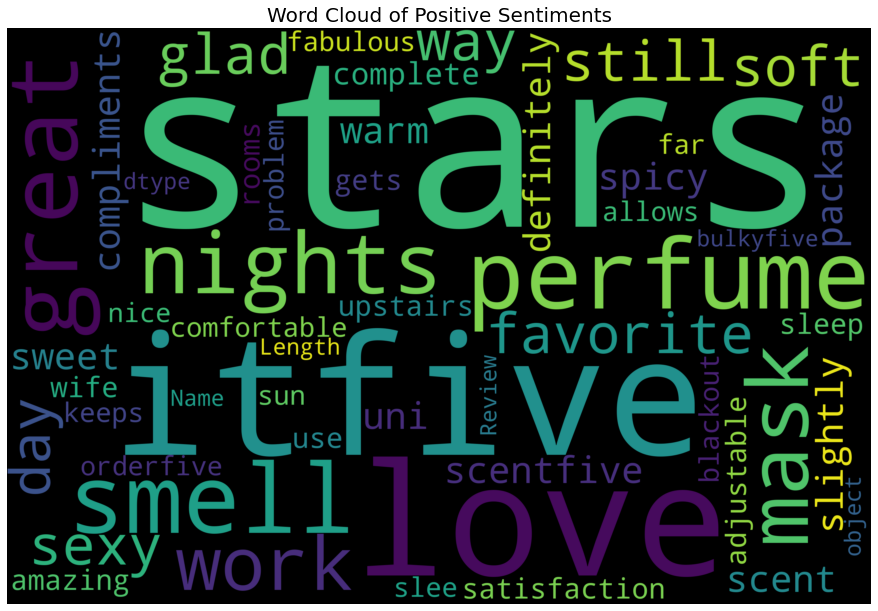

In [158]:
text = final_df[(final_df["Sentiment"] == 'Positive')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Positive Sentiments",fontsize=20)
plt.show()

## Love, stars and five are the most repeated words in positive sentiment

In [159]:
final_df.columns

Index(['Ratings', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'title', 'also_buy', 'brand', 'rank', 'also_view',
       'main_cat', 'price', 'Review', 'Style', 'polarity', 'Sentiment'],
      dtype='object')

In [160]:
'Five' in spacy_default_stopwords

False

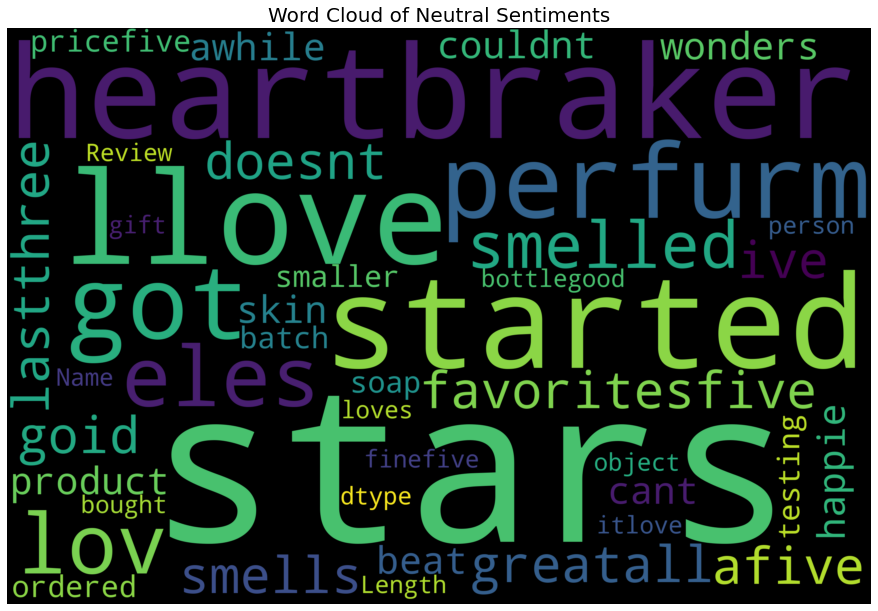

In [161]:
text = final_df[(final_df["Sentiment"] == 'Neutral')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Neutral Sentiments",fontsize=20)
plt.show()

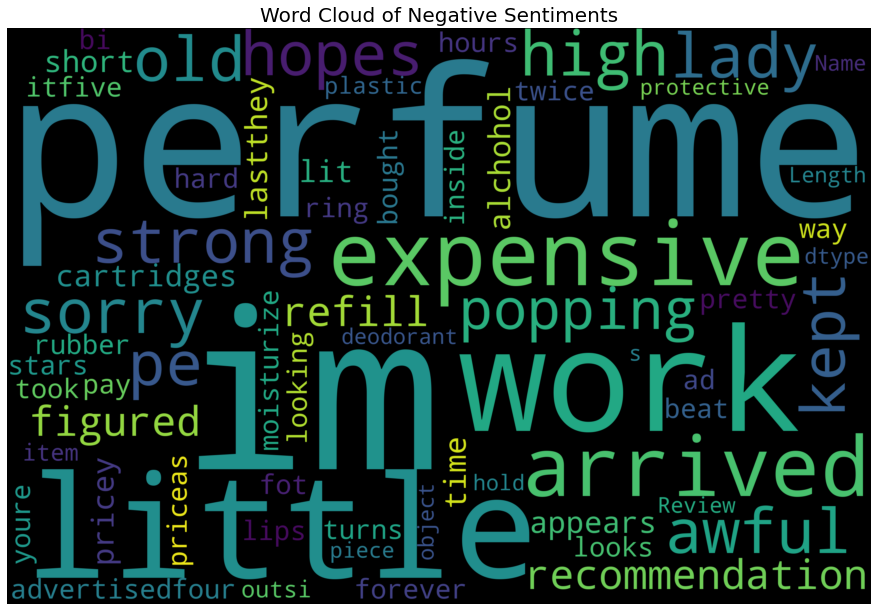

In [162]:
text = final_df[(final_df["Sentiment"] == 'Negative')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Negative Sentiments",fontsize=20)
plt.show()

In [163]:
import spacy
from spacy.lang.en import English
from spacy import displacy 
nlp = spacy.load('en_core_web_sm')

In [164]:
final_df['reviewTime']

0       2015-03-09
1       2015-03-02
2       2015-02-19
3       2015-01-14
4       2013-01-13
           ...    
70595   2018-08-31
70596   2016-11-17
70597   2016-10-05
70598   2016-10-05
70599   2017-07-02
Name: reviewTime, Length: 70600, dtype: datetime64[ns]

In [165]:
final_df.columns

Index(['Ratings', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'title', 'also_buy', 'brand', 'rank', 'also_view',
       'main_cat', 'price', 'Review', 'Style', 'polarity', 'Sentiment'],
      dtype='object')

In [166]:
final_df[final_df['brand']== '']

Ratings  verified reviewTime      reviewerID        asin  \
7681       5.0      True 2015-08-22   ACLZFBL64LT7Y  B000H723LU   
7682       1.0     False 2015-08-16   AS0GL9NAT7062  B000H723LU   
7683       4.0      True 2015-08-12   A8UWGWFEB6Y4J  B000H723LU   
7684       5.0     False 2015-08-12  A1V26WSUG7Q9EG  B000H723LU   
7685       2.0     False 2015-07-17   A95P5KAZCH9Y1  B000H723LU   
...        ...       ...        ...             ...         ...   
70476      5.0      True 2016-06-25  A12HBT75SDDVYI  B01FU073Z4   
70541      5.0      True 2018-09-15  A1YEO5KEW7M2GF  B01G96Z5MG   
70542      5.0      True 2018-07-19  A3JUGYDDDUXFRC  B01G96Z5MG   
70543      5.0     False 2016-08-17  A22H4HMNXNQ3BA  B01G96Z5MG   
70544      5.0      True 2017-07-31  A3DOL0OZ366KFC  B01G96YW16   

              reviewerName                                              title  \
7681        samira hammadi                     SK-II Facial Treatment Essence   
7682   Jenny&#039;s review                     SK-II Facial Treatment Essence   
7683                Stacey                     SK-II Facial Treatment Essence   
7684     Graham Wetzbarger                     SK-II Facial Treatment Essence   
7685             Jasmin E.                     SK-II Facial Treatment Essence   
...                    ...                                                ...   
70476              Nargiza  Naked Soap all natural Cleansing Face Soap for...   
70541             jehammer  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70542             Kelsey E  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70543             Kathleen  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70544      Amazon Customer  Desert Breeze Conditioner, Travel Size Hotel A...   

                                                also_buy brand  \
7681                                                  []         
7682                                                  []         
7683                                                  []         
7684                                                  []         
7685                                                  []         
...                                                  ...   ...   
70476                                       [B071S12WP7]         
70541  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...         
70542  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...         
70543  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...         
70544                                                 []         

                                      rank  \
7681   396,572 in Beauty & Personal Care (   
7682   396,572 in Beauty & Personal Care (   
7683   396,572 in Beauty & Personal Care (   
7684   396,572 in Beauty & Personal Care (   
7685   396,572 in Beauty & Personal Care (   
...                                    ...   
70476  417,851 in Beauty & Personal Care (   
70541  236,659 in Beauty & Personal Care (   
70542  236,659 in Beauty & Personal Care (   
70543  236,659 in Beauty & Personal Care (   
70544  772,129 in Beauty & Personal Care (   

                                               also_view    main_cat   price  \
7681   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7682   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7683   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7684   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7685   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
...                                                  ...         ...     ...   
70476   [B007M1ZQM2, B0009F79EQ, B072F8J72F, B07F2YKJFR]  All Beauty   15.59   
70541                                                 []  All Beauty   66.00   
70542                                                 []  All Beauty   66.00   
70543                                                 []  All Beauty   66.00   
705

In [167]:
final_df['brand'] = final_df['brand'].replace('',"ANONYMOUS_BRANDS")

In [168]:
final_df[final_df['brand']== 'ANONYMOUS_BRANDS']

Ratings  verified reviewTime      reviewerID        asin  \
7681       5.0      True 2015-08-22   ACLZFBL64LT7Y  B000H723LU   
7682       1.0     False 2015-08-16   AS0GL9NAT7062  B000H723LU   
7683       4.0      True 2015-08-12   A8UWGWFEB6Y4J  B000H723LU   
7684       5.0     False 2015-08-12  A1V26WSUG7Q9EG  B000H723LU   
7685       2.0     False 2015-07-17   A95P5KAZCH9Y1  B000H723LU   
...        ...       ...        ...             ...         ...   
70476      5.0      True 2016-06-25  A12HBT75SDDVYI  B01FU073Z4   
70541      5.0      True 2018-09-15  A1YEO5KEW7M2GF  B01G96Z5MG   
70542      5.0      True 2018-07-19  A3JUGYDDDUXFRC  B01G96Z5MG   
70543      5.0     False 2016-08-17  A22H4HMNXNQ3BA  B01G96Z5MG   
70544      5.0      True 2017-07-31  A3DOL0OZ366KFC  B01G96YW16   

              reviewerName                                              title  \
7681        samira hammadi                     SK-II Facial Treatment Essence   
7682   Jenny&#039;s review                     SK-II Facial Treatment Essence   
7683                Stacey                     SK-II Facial Treatment Essence   
7684     Graham Wetzbarger                     SK-II Facial Treatment Essence   
7685             Jasmin E.                     SK-II Facial Treatment Essence   
...                    ...                                                ...   
70476              Nargiza  Naked Soap all natural Cleansing Face Soap for...   
70541             jehammer  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70542             Kelsey E  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70543             Kathleen  Terra Pure Green Tea Lotion, 1.2 oz. In Jam Ja...   
70544      Amazon Customer  Desert Breeze Conditioner, Travel Size Hotel A...   

                                                also_buy             brand  \
7681                                                  []  ANONYMOUS_BRANDS   
7682                                                  []  ANONYMOUS_BRANDS   
7683                                                  []  ANONYMOUS_BRANDS   
7684                                                  []  ANONYMOUS_BRANDS   
7685                                                  []  ANONYMOUS_BRANDS   
...                                                  ...               ...   
70476                                       [B071S12WP7]  ANONYMOUS_BRANDS   
70541  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...  ANONYMOUS_BRANDS   
70542  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...  ANONYMOUS_BRANDS   
70543  [B01G96Z49A, B01G96Z364, B01G96Z88M, B07CH832V...  ANONYMOUS_BRANDS   
70544                                                 []  ANONYMOUS_BRANDS   

                                      rank  \
7681   396,572 in Beauty & Personal Care (   
7682   396,572 in Beauty & Personal Care (   
7683   396,572 in Beauty & Personal Care (   
7684   396,572 in Beauty & Personal Care (   
7685   396,572 in Beauty & Personal Care (   
...                                    ...   
70476  417,851 in Beauty & Personal Care (   
70541  236,659 in Beauty & Personal Care (   
70542  236,659 in Beauty & Personal Care (   
70543  236,659 in Beauty & Personal Care (   
70544  772,129 in Beauty & Personal Care (   

                                               also_view    main_cat   price  \
7681   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7682   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7683   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7684   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
7685   [B0739LQ1Z6, B00DW909OS, B075XFD9VP, B0716YHHN...  All Beauty  115.21   
...                                                  ...         ...     ...   
70476   [B007M1ZQM2, B0009F79EQ, B072F8J72F, B07F2YKJFR]  All Beauty   15.59   
70541                                                 []  All Beauty   66.00   
70542              

In [169]:
final_df[final_df['brand']== '']

Empty DataFrame
Columns: [Ratings, verified, reviewTime, reviewerID, asin, reviewerName, title, also_buy, brand, rank, also_view, main_cat, price, Review, Style, polarity, Sentiment]
Index: []

In [ ]:
#final_df.to_csv("/content/drive/MyDrive/CAPSTONE-PROJECT/captone_eda_file4.csv")

# Exploratory Data Analysis on cleaned and preprocessed dataset.

In [170]:
final_df['Ratings'].unique()

array([5., 2., 4., 3., 1.])

In [ ]:
#rr = pd.read_csv("/content/drive/MyDrive/CAPSTONE-PROJECT/captone_eda_file.csv")

In [ ]:
rr.drop(['Unnamed: 0'])

## Checking sentiment distriution.

<AxesSubplot:ylabel='Sentiment'>

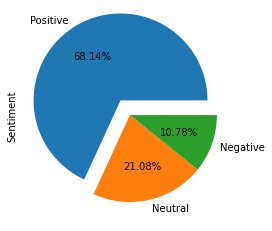

In [173]:
final_df['Sentiment'].value_counts().plot(kind='pie',autopct = '%0.2f%%',explode = [0.2,0,0])

Here we can observe that our distribution of reviews is not uniform 

That is, our dataset is not well balanced.


Hence for furthur classification models F1-Score would be the most appropiate evaluation measure to consider.

# Multiclass Classification
 (Positive,negative,neutral)

## Selecting relevant columns for classification.

In [174]:
final_df.columns

Index(['Ratings', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'title', 'also_buy', 'brand', 'rank', 'also_view',
       'main_cat', 'price', 'Review', 'Style', 'polarity', 'Sentiment'],
      dtype='object')

In [175]:
class_df = final_df.loc[:,["Review","Sentiment"]] #dataframe for our classification models.

In [176]:
class_df

Review Sentiment
0                   still day favorite glad itfive stars  Positive
1      love way perfume smells soft sexy scentfive stars  Positive
2                  love perfume compliments itfive stars  Positive
3      scent slightly sweet spicy warm definitely uni...  Positive
4      package complete satisfaction wife smell great...  Positive
...                                                  ...       ...
70595  took forever arrived could not beat priceas ad...  Negative
70596                  works far problem orderfive stars  Positive
70597  youre looking rubber inside hard plastic outsi...  Negative
70598                           nice not bulkyfive stars  Positive
70599  item arrived protective piece hold deodorant s...  Negative

[70600 rows x 2 columns]

## Label Encoding our target column

In [177]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
class_df["Sentiment"] = LE.fit_transform(class_df["Sentiment"])

In [178]:
class_df[class_df['Sentiment']==2] #positive sentiment labelled as 2

Review  Sentiment
0                   still day favorite glad itfive stars          2
1      love way perfume smells soft sexy scentfive stars          2
2                  love perfume compliments itfive stars          2
3      scent slightly sweet spicy warm definitely uni...          2
4      package complete satisfaction wife smell great...          2
...                                                  ...        ...
70591  use rooms upstairs gets amazing nights sleep r...          2
70593  great mask adjustable comfortable keeps sun we...          2
70594  fabulous work nights blackout mask allows slee...          2
70596                  works far problem orderfive stars          2
70598                           nice not bulkyfive stars          2

[48105 rows x 2 columns]

In [179]:
class_df[class_df['Sentiment']==1] #Neutral is labelled as 1

Review  Sentiment
5      llove heartbraker started perfurm got eles lov...          1
10                                      smelled greatall          1
14                                   favoritesfive stars          1
22                    smells goid doesnt lastthree stars          1
31                                           afive stars          1
...                                                  ...        ...
70580  ive product awhile wonders skin couldnt happie...          1
70584                          cant beat pricefive stars          1
70589  ordered batch soap testing smaller bottlegood ...          1
70590                    bought gift person loves itlove          1
70592                                     finefive stars          1

[14883 rows x 2 columns]

In [180]:
class_df[class_df['Sentiment']==0] #negative is labelled as 0

Review  Sentiment
44     im sorry perfume awful strong like old lady pe...          0
52     high hopes perfume kept popping recommendation...          0
60     figured refill cartridges appears alchohol lit...          0
65     little pricey short time lastthey work little ...          0
69                  expensive works advertisedfour stars          0
...                                                  ...        ...
70552  bought twice hours im moisturize lips turns bi...          0
70575  pretty ring looks way expensive pay fot itfive...          0
70595  took forever arrived could not beat priceas ad...          0
70597  youre looking rubber inside hard plastic outsi...          0
70599  item arrived protective piece hold deodorant s...          0

[7612 rows x 2 columns]

In [181]:
class_df['Sentiment'].unique()

array([2, 1, 0])

## Splitting the data into Train-Test-Split

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X = class_df['Review']
Y = class_df['Sentiment']

In [184]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)

## Model-1 
## **Multinomial Naive Bayes**

In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [186]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [187]:
from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')  

In [188]:
def funct(classifier_model,input_train,input_test,label_train,label_test):
    vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,stop_words=stopwords.words('english'),use_idf=True,smooth_idf=True)#tfidf vectorization for text to sparse matrix data
    X_train=vectorizer.fit_transform(input_train)         #vecrorizing our data
    X_test=vectorizer.transform(input_test)
    clf=classifier_model.fit(X_train,label_train)              # putting the ml model
    y_pred=clf.predict(X_test)                          # prediction trough fitting the model in data 
    plot_confusion_matrix(clf,X_test,label_test)        # plotting the matrix
    print(classification_report(label_test,y_pred))      # printing classification report of our model
    print('accuracy:', accuracy_score(label_test, y_pred))             
    print('recall:', recall_score(label_test, y_pred, average='weighted'))
    print('f1-score:', f1_score(label_test, y_pred,average='weighted'))
    print('precision:', precision_score(label_test, y_pred, average='weighted'))
    final_comp = pd.DataFrame(X_test)
    final_comp['Predict']=y_pred
    return label_test,final_comp,vectorizer

In [189]:
MNB = MultinomialNB()

              precision    recall  f1-score   support

           0       0.93      0.01      0.02      2343
           1       0.95      0.22      0.35      4403
           2       0.72      1.00      0.83     14434

    accuracy                           0.73     21180
   macro avg       0.86      0.41      0.40     21180
weighted avg       0.79      0.73      0.64     21180

accuracy: 0.7265816808309726
recall: 0.7265816808309726
f1-score: 0.6436666471688515
precision: 0.7868301648213344


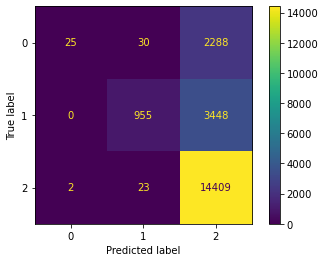

In [190]:
label_test,final_comp,vectorizer=funct(MNB,X_train,X_test,Y_train,Y_test)

In [191]:
type(final_comp.iloc[1:2,0])

pandas.core.series.Series

In [192]:
final_comp.iloc[1:2,0]

1      (0, 58653)\t0.5497898744006289\n  (0, 29364)...
Name: 0, dtype: object

In [193]:
final_comp

0  Predict
0        (0, 49195)\t0.17892898177280575\n  (0, 47877...        2
1        (0, 58653)\t0.5497898744006289\n  (0, 29364)...        2
2        (0, 55656)\t0.1521990184260519\n  (0, 40758)...        2
3        (0, 50592)\t0.6214613204356749\n  (0, 49195)...        2
4        (0, 46929)\t0.13223811178329958\n  (0, 41374...        2
...                                                  ...      ...
21175    (0, 49195)\t0.3763142790323522\n  (0, 21623)...        1
21176    (0, 49195)\t0.250835155114638\n  (0, 39809)\...        2
21177    (0, 49195)\t0.26384254143425345\n  (0, 39133...        2
21178    (0, 49195)\t0.15215000222346556\n  (0, 46255...        2
21179    (0, 45752)\t0.3221573868430017\n  (0, 44489)...        2

[21180 rows x 2 columns]

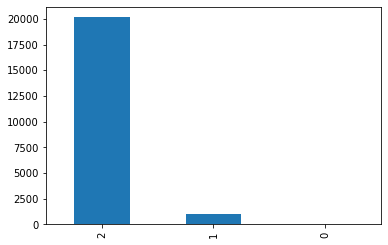

In [195]:
final_comp.Predict.value_counts().plot(kind='bar');

## Logistic Regression.

In [196]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.55      0.66      2343
           1       0.75      0.70      0.72      4403
           2       0.91      0.97      0.94     14434

    accuracy                           0.87     21180
   macro avg       0.82      0.74      0.77     21180
weighted avg       0.86      0.87      0.86     21180

accuracy: 0.868932955618508
recall: 0.868932955618508
f1-score: 0.8624960973749642
precision: 0.8632034162838479


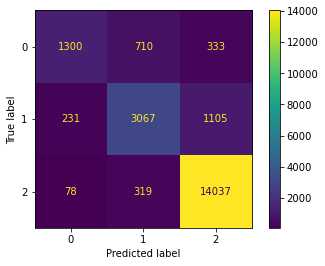

In [197]:
label_test,final_comp,vectorizer=funct(LogReg,X_train,X_test,Y_train,Y_test)

In [198]:
X_test.shape[0]

21180

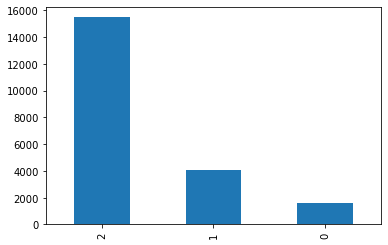

In [200]:
final_comp.Predict.value_counts().plot(kind='bar');

## Decision Tree Classifier

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
DTR = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      2343
           1       0.75      0.74      0.75      4403
           2       0.91      0.92      0.91     14434

    accuracy                           0.85     21180
   macro avg       0.78      0.76      0.77     21180
weighted avg       0.85      0.85      0.85     21180

accuracy: 0.8507554296506138
recall: 0.8507554296506138
f1-score: 0.849307905596508
precision: 0.8482326300118832


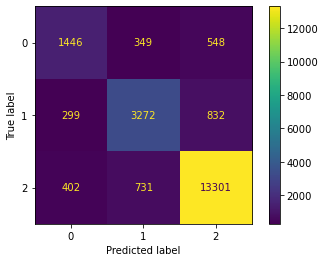

In [203]:
label_test,final_comp,vectorizer=funct(DTR,X_train,X_test,Y_train,Y_test)

# Time Series Analysis

In [204]:
final_df

Ratings  verified reviewTime      reviewerID        asin  \
0          5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006   
1          5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006   
2          5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006   
3          5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006   
4          5.0     False 2013-01-13  A3OCOP75PMY097  9790787006   
...        ...       ...        ...             ...         ...   
70595      3.0      True 2018-08-31  A1I7PLXBE8I160  B01HEYYRIK   
70596      5.0      True 2016-11-17  A212WAJ84YS6RV  B01HEYYRIK   
70597      2.0      True 2016-10-05  A1A8K80NOU6U4C  B01HEYYRIK   
70598      5.0      True 2016-10-05   APZLYTVXCR6US  B01HEYYRIK   
70599      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

          reviewerName                                              title  \
0         Petra Zender  Jenna Jameson Heartbreaker Perfume for women 3...   
1                    V  Jenna Jameson Heartbreaker Perfume for women 3...   
2      Linda Giambrone  Jenna Jameson Heartbreaker Perfume for women 3...   
3                 Kane  Jenna Jameson Heartbreaker Perfume for women 3...   
4          Jim Francis  Jenna Jameson Heartbreaker Perfume for women 3...   
...                ...                                                ...   
70595  Rosalinda Goleb  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70596           kryten  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70597         Crossy J  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70598   Sonya Elizalde  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70599  Amazon Customer  Degree Women MotionSense Antiperspirant Deodor...   

                                                also_buy              brand  \
0      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
1      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
2      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
3      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
4      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
...                                                  ...                ...   
70595                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70596                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70597                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70598                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70599  [B07CX6LG8J, B0014CW1WS, B06VXPJ5PB, B007F1LWW...  DEGREE WOMENS DEO   

                                          rank  \
0      298,893 in Beauty &amp; Personal Care (   
1      298,893 in Beauty &amp; Personal Care (   
2      298,893 in Beauty &amp; Personal Care (   
3      298,893 in Beauty &amp; Personal Care (   
4      298,893 in Beauty &amp; Personal Care (   
...                                        ...   
70595      271,281 in Beauty & Personal Care (   
70596      271,281 in Beauty & Personal Care (   
70597      271,281 in Beauty & Personal Care (   
70598      271,281 in Beauty & Personal Care (   
70599    1,162,299 in Beauty & Personal Care (   

                                               also_view    main_cat  price  \
0                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
1                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
2                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
3                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
4                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
...                                                  ...         ...    ...   
70595                                                 []  All Beauty   3.76   
70596                                                 []  All Beauty   3.76   
70597           

# Postive Sentiment Time Series Analysis

In [206]:
pos = final_df[final_df["Sentiment"]=="Positive"]
pos

Ratings  verified reviewTime      reviewerID        asin  \
0          5.0      True 2015-03-09   ASZO5WJA6FVVH  9790787006   
1          5.0      True 2015-03-02  A1KU7EEUGYOJYD  9790787006   
2          5.0      True 2015-02-19  A1907XNEJPEZEI  9790787006   
3          5.0      True 2015-01-14  A3U7B0EKSK16MQ  9790787006   
4          5.0     False 2013-01-13  A3OCOP75PMY097  9790787006   
...        ...       ...        ...             ...         ...   
70591      4.0      True 2017-10-31  A1JYBMC2D1S5RP  B01HE34SYE   
70593      5.0      True 2017-01-04  A263FAQU8T6FO1  B01HENDAU2   
70594      5.0      True 2016-12-24  A3DP36XSCHHI6Y  B01HENDAU2   
70596      5.0      True 2016-11-17  A212WAJ84YS6RV  B01HEYYRIK   
70598      5.0      True 2016-10-05   APZLYTVXCR6US  B01HEYYRIK   

            reviewerName                                              title  \
0           Petra Zender  Jenna Jameson Heartbreaker Perfume for women 3...   
1                      V  Jenna Jameson Heartbreaker Perfume for women 3...   
2        Linda Giambrone  Jenna Jameson Heartbreaker Perfume for women 3...   
3                   Kane  Jenna Jameson Heartbreaker Perfume for women 3...   
4            Jim Francis  Jenna Jameson Heartbreaker Perfume for women 3...   
...                  ...                                                ...   
70591  Walter W. Douglas  Barnhouse - Lavender - Premium Grade Fragrance...   
70593    Amazon Customer  Alafen Mulberry Silk Super Smooth Soft Eye Sle...   
70594         Happy user  Alafen Mulberry Silk Super Smooth Soft Eye Sle...   
70596             kryten  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70598     Sonya Elizalde  AutumnFall&reg; Shockproof Armor Stand Case Co...   

                                                also_buy           brand  \
0      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...   Jenna Jameson   
1      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...   Jenna Jameson   
2      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...   Jenna Jameson   
3      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...   Jenna Jameson   
4      [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...   Jenna Jameson   
...                                                  ...             ...   
70591  [B00RBB7X60, B01HE3FJAQ, B01BCUO4FI, B01HE2IBC...  Barnhouse Blue   
70593                                                 []          Alafen   
70594                                                 []          Alafen   
70596                           [B013JDY10E, B01MTL30LD]      AutumnFall   
70598                           [B013JDY10E, B01MTL30LD]      AutumnFall   

                                                    rank  \
0                298,893 in Beauty &amp; Personal Care (   
1                298,893 in Beauty &amp; Personal Care (   
2                298,893 in Beauty &amp; Personal Care (   
3                298,893 in Beauty &amp; Personal Care (   
4                298,893 in Beauty &amp; Personal Care (   
...                                                  ...   
70591  [>#243,409 in Beauty & Personal Care (See Top ...   
70593                939,669 in Beauty & Personal Care (   
70594                939,669 in Beauty & Personal Care (   
70596                271,281 in Beauty & Personal Care (   
70598                271,281 in Beauty & Personal Care (   

                                               also_view    main_cat  price  \
0                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
1                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
2                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
3                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
4                   [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
...                                                  ...         ...    ...   
70591                                                 []  All Beau

In [207]:
pos_df = pos.loc[:,["reviewTime","polarity"]]

pos_df["reviewTime"] = pd.to_datetime(pos_df["reviewTime"])

In [209]:
pos_df.set_index('reviewTime',inplace=True)
pos_df.sort_index(inplace=True)
pos_df

polarity
reviewTime          
2002-03-22  0.461111
2002-04-06  0.366667
2003-05-22  0.166667
2003-12-11  0.250000
2004-02-22  0.217197
...              ...
2018-09-26  0.700000
2018-09-26  0.292857
2018-09-26  0.450000
2018-09-27  0.243223
2018-09-29  0.494286

[48105 rows x 1 columns]

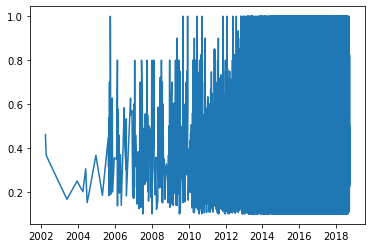

In [210]:
plt.plot(pos_df);

In [211]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [213]:
pos_df= pos_df.resample('MS').mean()
pos_df.isnull().sum()

polarity    33
dtype: int64

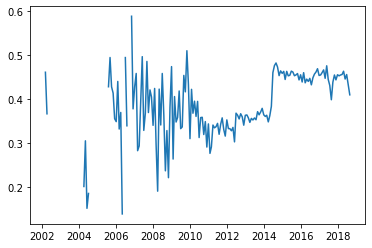

In [214]:
plt.plot(pos_df);

In [215]:
pos_df["polarity"] = pos_df["polarity"].interpolate(option="spline")

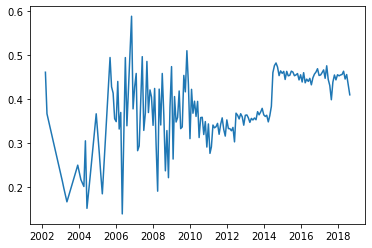

In [216]:
plt.plot(pos_df);

In [217]:
def check_data(data):
    pvalue = adfuller(data)[1]
    print("pvalue",pvalue)
    if pvalue < 0.05:
        msg = "Data is stationary"
    else:
        msg = "Data is not stationary"
    return msg

In [218]:
check_data(pos_df)

pvalue 0.4440847010512977


'Data is not stationary'

In [219]:
for i in range(1,5):
    x = pos_df-pos_df.shift(i)
    x.dropna(inplace=True)
    msg = check_data(x)
    if msg == "Data is stationary":
        print("Shift value",i,msg)
        break

pvalue 2.3779589608334565e-07
Shift value 1 Data is stationary


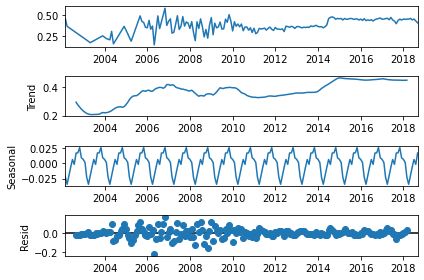

In [220]:
dec = seasonal_decompose(pos_df)
dec.plot()
plt.tight_layout();

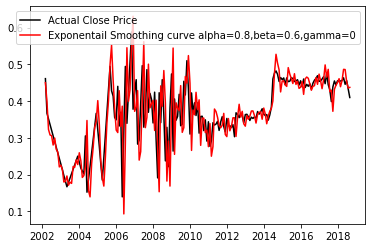

In [222]:
alpha = 0.8
beta = 0.6
gamma = 0
model = ExponentialSmoothing(pos_df,trend='add',seasonal='add').fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
plt.plot(pos_df,color='black',label="Actual Close Price")
plt.plot(model.fittedvalues,color="red",label=f'Exponentail Smoothing curve alpha={alpha},beta={beta},gamma={gamma}')
plt.legend()
plt.show();

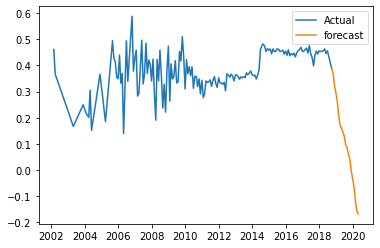

In [223]:
cd = model.forecast(20)
bx = pos_df["polarity"].append(cd[0:1])
plt.plot(bx,label="Actual")
plt.plot(cd,label="forecast")
plt.legend();

In [224]:
check_data(model.fittedvalues)

pvalue 0.5357555494252614


'Data is not stationary'

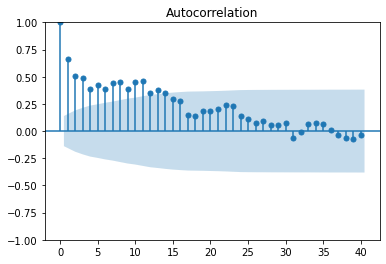

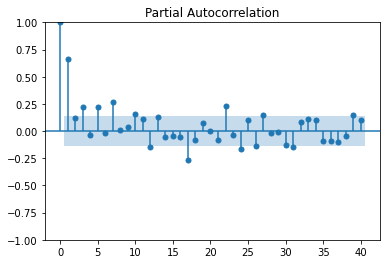

In [225]:
plot_acf(model.fittedvalues,lags=40)
plot_pacf(model.fittedvalues,lags=40);

In [226]:
for p in range(1,12):
    for q in range(1,8):
        mod = sm.tsa.statespace.SARIMAX(pos_df,order=(p,1,q),seasonal_order=None).fit()
        print("for ", p , q, mod.aic)

for  1 1 -571.0024075485823
for  1 2 -578.9875294926143
for  1 3 -576.9891797289663
for  1 4 -581.0048628176455
for  1 5 -579.0815536110805
for  1 6 -577.2271430329916
for  1 7 -577.3111180395039
for  2 1 -572.2346407141625
for  2 2 -576.9915343167008
for  2 3 -577.2797747615593
for  2 4 -579.0044091502361
for  2 5 -577.0321601510664
for  2 6 -591.6132408749384
for  2 7 -589.3987938959621
for  3 1 -570.4959945165147
for  3 2 -580.992823742405
for  3 3 -579.5391100600266
for  3 4 -577.589074388852
for  3 5 -575.5781344704166
for  3 6 -588.2069563443529
for  3 7 -569.1194124189846
for  4 1 -574.9901132341391
for  4 2 -574.773115597075
for  4 3 -577.6236821605412
for  4 4 -575.2896569678895
for  4 5 -581.0094927117711
for  4 6 -585.2162523923143
for  4 7 -580.1937112059122
for  5 1 -573.4772324886412
for  5 2 -575.8250278154701
for  5 3 -573.9170309164015
for  5 4 -574.9892593193106
for  5 5 -580.8053248940175
for  5 6 -584.3764471552772
for  5 7 -585.5932661466918
for  6 1 -580.609640573

In [227]:
po_mod = sm.tsa.statespace.SARIMAX(pos_df,order=(3,1,1),seasonal_order=(1,1,1,10)).fit()
p_model = po_mod.fittedvalues
print(po_mod.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           polarity   No. Observations:                  199
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 10)   Log Likelihood                 262.223
Date:                            Mon, 06 Mar 2023   AIC                           -510.446
Time:                                    19:41:27   BIC                           -487.791
Sample:                                03-01-2002   HQIC                          -501.267
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.131      2.438      0.015       0.063       0.578
ar.L2          0.0635      0.074   

In [228]:
pvalue = sm.stats.acorr_ljungbox(po_mod.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0.BAD MODEL')
else:
    print("FAILED to Reject H0.Good MODEL")

[0.62512321]
FAILED to Reject H0.Good MODEL


In [229]:
ss = po_mod.forecast(60)

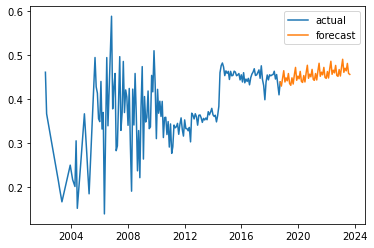

In [230]:
xd = pos_df["polarity"].append(ss[0:1])

plt.plot(xd,label="actual")
plt.plot(ss,label="forecast")
plt.legend();

In [231]:
rows = int(0.8*len(pos_df))
po_trn = pos_df[:rows]
po_tst = pos_df[rows:]

In [232]:
pop_mod = sm.tsa.statespace.SARIMAX(po_trn,order=(3,1,1),seasonal_order=(1,1,1,10)).fit()
pp_model = pop_mod.fittedvalues
print(pop_mod.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           polarity   No. Observations:                  159
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 10)   Log Likelihood                 189.003
Date:                            Mon, 06 Mar 2023   AIC                           -364.006
Time:                                    19:42:43   BIC                           -343.026
Sample:                                03-01-2002   HQIC                          -355.482
                                     - 05-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3116      0.178      1.749      0.080      -0.038       0.661
ar.L2          0.0548      0.096   

In [233]:
pp_str = len(po_trn)
pp_end = len(po_trn)+(len(po_tst)-1)

In [234]:
pvalue = sm.stats.acorr_ljungbox(pop_mod.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0.BAD MODEL')
else:
    print("FAILED to Reject H0.Good MODEL")

[0.59741429]
FAILED to Reject H0.Good MODEL


In [235]:
pp_pred = pop_mod.predict(pp_str,pp_end)

In [236]:
df_sarima_res_pos = pd.DataFrame({"Predictions":pp_pred})
df_sarima_res_pos["Actual"] = po_tst
df_sarima_res_pos["err"] = df_sarima_res_pos["Actual"]-df_sarima_res_pos["Predictions"]

df_sarima_res_pos

Predictions    Actual       err
2015-06-01     0.465583  0.454125 -0.011457
2015-07-01     0.449846  0.463606  0.013760
2015-08-01     0.471036  0.461546 -0.009489
2015-09-01     0.487876  0.453154 -0.034722
2015-10-01     0.454316  0.454999  0.000683
2015-11-01     0.464110  0.458156 -0.005954
2015-12-01     0.459677  0.443676 -0.016001
2016-01-01     0.476873  0.455284 -0.021590
2016-02-01     0.452575  0.438949 -0.013626
2016-03-01     0.449226  0.460105  0.010879
2016-04-01     0.468613  0.437110 -0.031504
2016-05-01     0.448216  0.445530 -0.002686
2016-06-01     0.473888  0.440256 -0.033632
2016-07-01     0.495505  0.447229 -0.048275
2016-08-01     0.457852  0.432519 -0.025333
2016-09-01     0.469441  0.448646 -0.020795
2016-10-01     0.464440  0.456816 -0.007623
2016-11-01     0.485162  0.461595 -0.023566
2016-12-01     0.456874  0.469111  0.012237
2017-01-01     0.454249  0.453742 -0.000508
2017-02-01     0.474329  0.454990 -0.019339
2017-03-01     0.453517  0.460123  0.006606
2017-04-01     0.479640  0.466409 -0.013230
2017-05-01     0.501727  0.447333 -0.054394
2017-06-01     0.463693  0.475745  0.012052
2017-07-01     0.475461  0.444743 -0.030718
2017-08-01     0.470409  0.430912 -0.039497
2017-09-01     0.491472  0.398593 -0.092880
2017-10-01     0.462804  0.438500 -0.024304
2017-11-01     0.460251  0.454872 -0.005379
2017-12-01     0.480398  0.443775 -0.036623
2018-01-01     0.459547  0.455361 -0.004186
2018-02-01     0.485713  0.452960 -0.032753
2018-03-01     0.507846  0.454848 -0.052998
2018-04-01     0.469775  0.455931 -0.013845
2018-05-01     0.481561  0.463407 -0.018154
2018-06-01     0.476504  0.445700 -0.030805
2018-07-01     0.497600  0.455904 -0.041696
2018-08-01     0.468896  0.433104 -0.035792
2018-09-01     0.466349  0.409765 -0.056583

In [238]:
pos_pp = po_trn["polarity"].append(pp_pred[0:1])

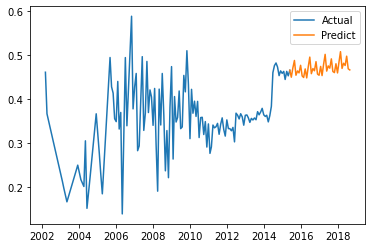

In [239]:
plt.plot(pos_pp,label="Actual")
plt.plot(pp_pred,label="Predict")
plt.legend();

In [240]:
from sklearn.metrics import mean_squared_error
pos_mse = mean_squared_error(pp_pred,po_tst)
print("Positive mse",pos_mse)
print("Positive rmse",np.sqrt(pos_mse))

Positive mse 0.0009338907306061442
Positive rmse 0.030559625825689427


# Negative Sentiment Time Series Analysis

In [241]:
neg = final_df[final_df["Sentiment"]=="Negative"]
neg

Ratings  verified reviewTime      reviewerID        asin  \
44         1.0      True 2017-11-11  A2KZ14A2IO4UIY  9790787006   
52         1.0      True 2017-01-22  A2TG033LVR74PU  9790787006   
60         4.0     False 2002-02-26  A35O29DECBXK3N  B000050FDY   
65         4.0      True 2018-05-06   AIQ4VMVNXMWTH  B000050FDY   
69         4.0      True 2018-05-05    ADLNYNSGWBNA  B000050FDY   
...        ...       ...        ...             ...         ...   
70552      4.0      True 2018-09-07  A1EBHZPAYMILW9  B01GFR0W2W   
70575      5.0      True 2017-07-23  A23LI0H4B9VQL8  B01GRP5MC2   
70595      3.0      True 2018-08-31  A1I7PLXBE8I160  B01HEYYRIK   
70597      2.0      True 2016-10-05  A1A8K80NOU6U4C  B01HEYYRIK   
70599      1.0      True 2017-07-02   AUG30JEFFDB4L  B01HIE3EK8   

          reviewerName                                              title  \
44               Sandy  Jenna Jameson Heartbreaker Perfume for women 3...   
52            Sunshine  Jenna Jameson Heartbreaker Perfume for women 3...   
60          Paul Costa  Braun Clean &amp; Renew Refill Cartridges CCR ...   
65           Lowryders  Braun Clean &amp; Renew Refill Cartridges CCR ...   
69               Chris  Braun Clean &amp; Renew Refill Cartridges CCR ...   
...                ...                                                ...   
70552               RK  [LABIOTTE] Wine Lip Balm (7gram) Tinted Lip Wh...   
70575          Donna S  Empsoul 925 Sterling Silver Natural Chic Fille...   
70595  Rosalinda Goleb  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70597         Crossy J  AutumnFall&reg; Shockproof Armor Stand Case Co...   
70599  Amazon Customer  Degree Women MotionSense Antiperspirant Deodor...   

                                                also_buy              brand  \
44     [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
52     [B004D8JQ4G, B0020MMD0G, B00ENL4HJW, B011YR4E4...      Jenna Jameson   
60                                                    []              Braun   
65                                                    []              Braun   
69                                                    []              Braun   
...                                                  ...                ...   
70552  [B01FSEKIUY, B01EXW2AJ4, B01M4M5GLH, B01EXW2AM...           LABIOTTE   
70575                                                 []            Empsoul   
70595                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70597                           [B013JDY10E, B01MTL30LD]         AutumnFall   
70599  [B07CX6LG8J, B0014CW1WS, B06VXPJ5PB, B007F1LWW...  DEGREE WOMENS DEO   

                                          rank  \
44     298,893 in Beauty &amp; Personal Care (   
52     298,893 in Beauty &amp; Personal Care (   
60           1,028 in Beauty & Personal Care (   
65           1,028 in Beauty & Personal Care (   
69           1,028 in Beauty & Personal Care (   
...                                        ...   
70552      516,565 in Beauty & Personal Care (   
70575    1,731,077 in Beauty & Personal Care (   
70595      271,281 in Beauty & Personal Care (   
70597      271,281 in Beauty & Personal Care (   
70599    1,162,299 in Beauty & Personal Care (   

                                               also_view    main_cat  price  \
44                  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
52                  [B00357FTX8, B01NBID7FJ, B0017JT658]  All Beauty  13.85   
60     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK...  All Beauty  11.94   
65     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK...  All Beauty  11.94   
69     [B000KND8IS, B07L9PW8R3, B071KCNQTR, B0786ZZQK...  All Beauty  11.94   
...                                                  ...         ...    ...   
70552                                                 []  All Beauty  11.89   
70575               [B07H81YCWR, B01E2F4VC6, B06Y2VXQ7Y]  All Beauty   5.02   
70595           

In [242]:
neg_df = neg.loc[:,["reviewTime","polarity"]]
neg_df["reviewTime"] = pd.to_datetime(neg_df["reviewTime"])

In [243]:
neg_df.set_index('reviewTime',inplace=True)
neg_df.sort_index(inplace=True)
neg_df

polarity
reviewTime          
2002-02-26 -0.187500
2005-02-22 -0.050000
2005-06-29 -0.031926
2006-02-02 -0.025694
2006-02-18 -0.083333
...              ...
2018-09-20 -0.034632
2018-09-20 -0.057857
2018-09-23 -0.325000
2018-09-24 -0.100000
2018-09-26 -0.200000

[7612 rows x 1 columns]

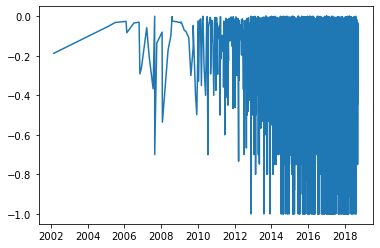

In [244]:
plt.plot(neg_df);

In [245]:
neg_df= neg_df.resample('MS').mean()
neg_df.isnull().sum()

polarity    69
dtype: int64

In [246]:
neg_df["polarity"] = neg_df["polarity"].interpolate(option='spline')
neg_df.isnull().sum()

polarity    0
dtype: int64

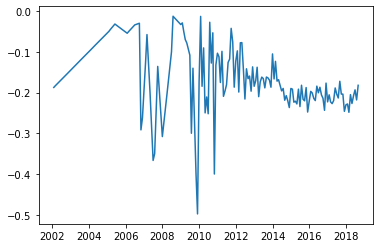

In [247]:
plt.plot(neg_df);

In [248]:
check_data(neg_df)

pvalue 0.05258517638495807


'Data is not stationary'

In [250]:
for i in range(1,5):
    x = neg_df-neg_df.shift(i)
    x.dropna(inplace=True)
    msg = check_data(x)
    if msg == "Data is stationary":
        print("Shift value",i,msg)
        break

pvalue 1.5964891433804491e-18
Shift value 1 Data is stationary


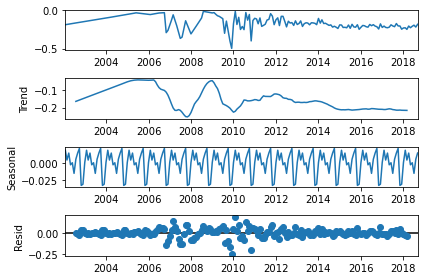

In [249]:
dec_n = seasonal_decompose(neg_df)
dec_n.plot()
plt.tight_layout();

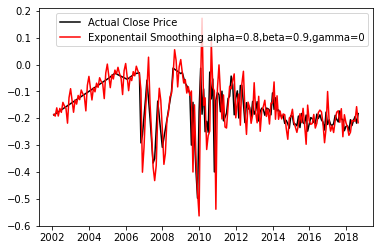

In [252]:
alpha = 0.8
bete = 0.2
gamma = 0
model = ExponentialSmoothing(neg_df,trend='add',seasonal='add').fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
plt.plot(neg_df,color='black',label="Actual Close Price")
plt.plot(model.fittedvalues,color="red",label=f'Exponentail Smoothing alpha={alpha},beta={beta},gamma={gamma}')
plt.legend()
plt.show();

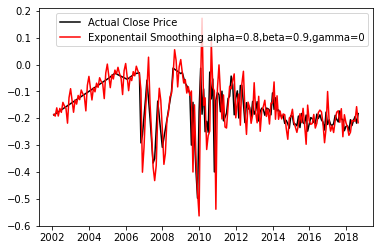

In [253]:
alpha = 0.8
bete = 0.2
gamma = 0
model = ExponentialSmoothing(neg_df,trend='add',seasonal='add').fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
plt.plot(neg_df,color='black',label="Actual Close Price")
plt.plot(model.fittedvalues,color="red",label=f'Exponentail Smoothing alpha={alpha},beta={beta},gamma={gamma}')
plt.legend()
plt.show();

In [254]:
sx = model.forecast(60)
dd = neg_df["polarity"].append(sx[0:1])

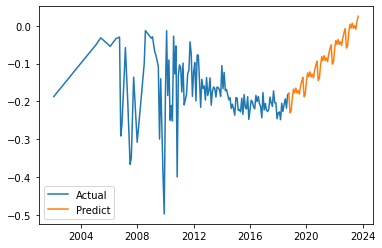

In [255]:
plt.plot(dd,label="Actual")
plt.plot(sx,label="Predict")
plt.legend();

In [256]:
check_data(model.fittedvalues)

pvalue 0.040449270129907434


'Data is stationary'

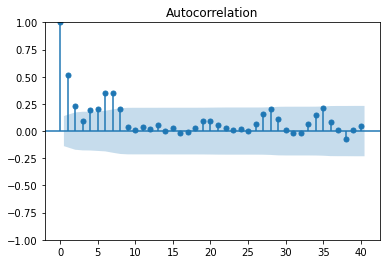

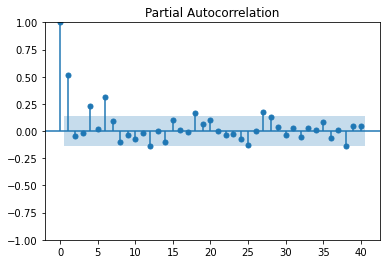

In [257]:
plot_acf(model.fittedvalues,lags=40)
plot_pacf(model.fittedvalues,lags=40);

In [ ]:
#q = 6,p=4

In [258]:
for q in range(1,7):
    for p in range(1,5):
        mod = sm.tsa.statespace.SARIMAX(neg_df,order=(p,1,q),seasonal_order=None).fit()
        print("for ", p , q, mod.aic)

for  1 1 -545.6005589707063
for  2 1 -545.8958421747902
for  3 1 -550.2228329195377
for  4 1 -548.6753333947429
for  1 2 -545.7414172677238
for  2 2 -550.2911565947404
for  3 2 -551.5541569069478
for  4 2 -549.5166402988579
for  1 3 -555.0865289740591
for  2 3 -553.1030260661993
for  3 3 -553.4001372403691
for  4 3 -552.5674028048712
for  1 4 -553.1067911385251
for  2 4 -551.1065328340153
for  3 4 -552.7830208385637
for  4 4 -554.0217320186612
for  1 5 -550.7109658218429
for  2 5 -549.1138878840397
for  3 5 -552.9387520332964
for  4 5 -553.4562341763503
for  1 6 -550.4249292293562
for  2 6 -554.8734484411343
for  3 6 -554.7982834975969
for  4 6 -552.8216717974749


In [259]:
neg_mod = sm.tsa.statespace.SARIMAX(neg_df,order=(1,1,1),seasonal_order=(1,1,1,9)).fit()
n_model = neg_mod.fittedvalues
print(neg_mod.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          polarity   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 9)   Log Likelihood                 250.882
Date:                           Mon, 06 Mar 2023   AIC                           -491.763
Time:                                   19:56:42   BIC                           -475.528
Sample:                               02-01-2002   HQIC                          -485.187
                                    - 09-01-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181      0.080      3.960      0.000       0.161       0.476
ma.L1         -0.7613      0.058    -13.066

In [260]:
pvalue = sm.stats.acorr_ljungbox(neg_mod.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0.BAD MODEL')
else:
    print("FAILED to Reject H0.Good MODEL")

[0.95989457]
FAILED to Reject H0.Good MODEL


In [261]:
ng_pred = neg_mod.forecast(60)
nd = neg_df["polarity"].append(ng_pred[0:1])

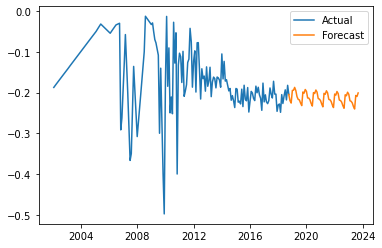

In [262]:
plt.plot(nd,label="Actual")
plt.plot(ng_pred,label="Forecast")
plt.legend();

In [263]:
n_num = int(0.8*len(neg_df))
neg_trn = neg_df[:n_num]
neg_tst = neg_df[n_num:]


In [264]:
negs_mod = sm.tsa.statespace.SARIMAX(neg_trn,order=(1,1,1),seasonal_order=(1,1,1,9)).fit()
nn_model = negs_mod.fittedvalues
print(neg_mod.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          polarity   No. Observations:                  200
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 9)   Log Likelihood                 250.882
Date:                           Mon, 06 Mar 2023   AIC                           -491.763
Time:                                   19:57:53   BIC                           -475.528
Sample:                               02-01-2002   HQIC                          -485.187
                                    - 09-01-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181      0.080      3.960      0.000       0.161       0.476
ma.L1         -0.7613      0.058    -13.066

In [265]:
pvalue = sm.stats.acorr_ljungbox(negs_mod.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0.BAD MODEL')
else:
    print("FAILED to Reject H0.Good MODEL")

[0.24026391]
FAILED to Reject H0.Good MODEL


In [266]:
nn_str = len(neg_trn)
nn_end = len(neg_trn)+len(neg_tst)-1

In [267]:
nn_pred = negs_mod.predict(nn_str,nn_end)
nnd = neg_trn["polarity"].append(nn_pred[0:1])

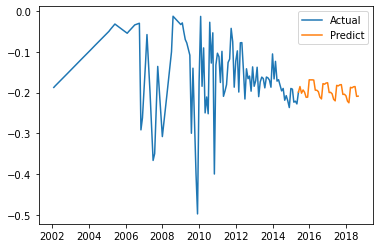

In [268]:
plt.plot(nnd,label="Actual")
plt.plot(nn_pred,label="Predict")
plt.legend();

In [270]:
ndf_sarima_res = pd.DataFrame({"Predictions":nn_pred})
ndf_sarima_res["Actual"] = neg_tst
ndf_sarima_res["err"] = ndf_sarima_res["Actual"]-ndf_sarima_res["Predictions"]

ndf_sarima_res

Predictions    Actual       err
2015-06-01    -0.199069 -0.191747  0.007322
2015-07-01    -0.185288 -0.234512 -0.049224
2015-08-01    -0.201639 -0.182114  0.019525
2015-09-01    -0.193705 -0.216650 -0.022945
2015-10-01    -0.199324 -0.220303 -0.020979
2015-11-01    -0.211779 -0.187829  0.023950
2015-12-01    -0.211358 -0.247927 -0.036569
2016-01-01    -0.168784 -0.221288 -0.052504
2016-02-01    -0.168985 -0.197214 -0.028228
2016-03-01    -0.168829 -0.201023 -0.032194
2016-04-01    -0.169437 -0.214437 -0.045000
2016-05-01    -0.194235 -0.219763 -0.025529
2016-06-01    -0.194383 -0.184320  0.010063
2016-07-01    -0.197873 -0.200620 -0.002746
2016-08-01    -0.211332 -0.187107  0.024225
2016-09-01    -0.215690 -0.205930  0.009760
2016-10-01    -0.178217 -0.214030 -0.035813
2016-11-01    -0.179632 -0.243697 -0.064065
2016-12-01    -0.176750 -0.176895 -0.000145
2017-01-01    -0.176034 -0.222970 -0.046937
2017-02-01    -0.200062 -0.205660 -0.005598
2017-03-01    -0.199432 -0.222924 -0.023492
2017-04-01    -0.203198 -0.227249 -0.024051
2017-05-01    -0.216581 -0.219904 -0.003323
2017-06-01    -0.220451 -0.188820  0.031631
2017-07-01    -0.182449 -0.203830 -0.021381
2017-08-01    -0.183742 -0.213401 -0.029659
2017-09-01    -0.181154 -0.172385  0.008769
2017-10-01    -0.180581 -0.203857 -0.023276
2017-11-01    -0.204693 -0.203913  0.000780
2017-12-01    -0.204147 -0.246203 -0.042056
2018-01-01    -0.207885 -0.230181 -0.022297
2018-02-01    -0.221276 -0.228119 -0.006844
2018-03-01    -0.225198 -0.248556 -0.023358
2018-04-01    -0.187252 -0.205155 -0.017903
2018-05-01    -0.188559 -0.226904 -0.038346
2018-06-01    -0.185939 -0.207850 -0.021911
2018-07-01    -0.185352 -0.193478 -0.008127
2018-08-01    -0.209455 -0.218170 -0.008715
2018-09-01    -0.208900 -0.182327  0.026573

In [271]:
neg_mse = mean_squared_error(nn_pred,neg_tst)
print("Negative mse",neg_mse)
print("Negative rmse",np.sqrt(neg_mse))

Positive mse 0.0007872403486479295
Positive rmse 0.02805780370321115


In [272]:
import plotly.express as px
import plotly.graph_objects as go

Charts of Time series Forecasted

In [273]:
x = xd.index
y = xd.values
trace1 = go.Scatter(x=x,y=y,name="Pervious Trend of Positive Reviews")
x1 = ss.index
y1 = ss.values
trace2 = go.Scatter(x=x1,y=y1,name="Forecasted Trend of Positive Reviews")

data = [trace1,trace2]
layout = go.Layout(title = "All Beauty",yaxis=dict(title="Polarity score",zeroline=True,showline=True),
                  xaxis = dict(title = "Year"))

fig = go.Figure(data=data,layout=layout)
fig.show()

In [274]:
x = nd.index
y = nd.values
trace1 = go.Scatter(x=x,y=y,name="Pervious trend of Negative Reviews")
x1 = ng_pred.index
y1 = ng_pred.values
trace2 = go.Scatter(x=x1,y=y1,name="Forecasted Future trend of Negative Reviews")

data = [trace1,trace2]
layout = go.Layout(title = "All Beauty",yaxis=dict(title="Polarity Score",zeroline=True,showline=True),
                  xaxis = dict(title = "Year"))

fig = go.Figure(data=data,layout=layout)
fig.show()